# TP 1 : découverte de SageMath

In [1]:
# Pour améliorer l'affichage dans ce TP :
%display latex

## Quelques calculs

### Question
1. Calculer $25/7 + 1/134$ de manière exacte. En déduire une approximation avec 10 bits de précision, puis avec 100 bits de précision. *Utiliser `v.n(b)` pour connaître `v` avec `b` bits de précision.*
1. Calculer $\cos(\pi/6)$ de manière exacte, puis approchée avec 10 bits de précision.

In [2]:
25/7+1/134, (25/7+1/134).n(10), (25/7+1/134).n(100)

(3357/938, 3.6, 3.5788912579957356076759061834)

In [3]:
cos(pi/6), cos(pi/6).n(10)

(1/2*sqrt(3), 0.87)

## Question
Un nombre complexe $z=a+ib$ peut se représenter par le point $(a,b)$ dans le plan complexe (l'abscisse est l'axe réel et l'ordonnée est l'axe complexe). Une autre facon de représenter ce nombre complexe $z$ est d'utiliser ses coordonnées polaires $(\rho,\theta)$ tel que $z = \rho \times e^{i\theta}$. On dit alors que $\rho$ est le module de $z$, il correspond à la longueur du vecteur $(a,b)$, et que $\theta$ est l'argument de $z$, il correspond à l'angle avec l'axe réel.
L'exemple ci-dessous illustre graphiquement ces deux représentations.

*La constante $i$ s'obtient avec `i` ou `I`. Si on a effacé sa valeur (en utilisant `i` et `I` comme variables), on peut la retrouver avec `SR('I')`.*

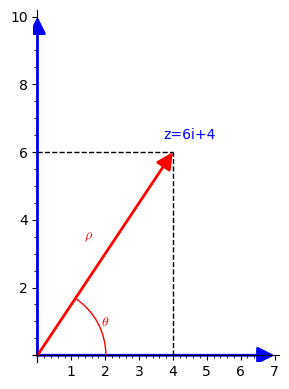

In [4]:
plot(vector((0,10)))+plot(vector((7,0)))+plot(vector((4,6)),color="red")+\
line2d([(4,0),(4,6)], color='black', linestyle='--')+\
line2d([(0,6),(4,6)], color='black', linestyle='--')+text("z=6i+4",(4.5,6.5))+\
arc((0,0),2.02,sector=(0,3*pi/9.5),color="red")+text(r"$\theta$",(2,1),color="red")+text(r"$\rho$",(1.5,3.5),color="red")



Calculer les coordonnées polaires $(r,t)$ de $z=6i+4$ et vérifier l'égalité $z=r e^{it}$.

In [1]:
def module(p):
    return sqrt((p[0]^2)+(p[1]^2))

def argument(p):
    return arg(p[0]+I*p[1])

module((4,6)),abs(4+I*6), argument((4,6)), arg(4+I*6), bool(4+6*I==module((4,6))*exp(I*arg(4+I*6)))

(2*sqrt(13), 2*sqrt(13), arctan(3/2), arctan(3/2), True)

### Question
On cherche à déterminer la valeur de $(1-i)^k$ pour tout $k≥0$, où $i^2=-1$. 
L'objectif est de trouver une formule simple en fonction de $k$. Pour cela nous allons utiliser la représentation polaire.
L'animation proposée ci-dessous pourra vous aider à comprendre ce qu'il se passe.

   
1. Calculer la liste $L$ des $(1-i)^k$ pour $k = 0$ à $10$.
2. Afficher pour chaque élément de $L$ son module. *On obtient le module avec `abs(z)`.*
3. Afficher pour chaque élément de $L$ son argument. *On obtient l'argument avec `arg(z)`.*
4. Conjecturer les valeurs en fonction de $k$ du module et de l'argument de $(1-i)^k$.
Vérifier vos conjectures pour le module et l'argument en définissant une fonction $z(k)$ et en testant si $z(k) = (1-i)^k$ pour tout $k$ entre $0$ et $100$. *On pourra utiliser le mot-clef Python `all`.*
5. Vérifier *formellement* vos conjectures. *On définira $k$ comme une variable symbolique avec `var('k')`.*


In [6]:
# CODE A EXECUTER
kmax=10
@interact
def _(k=slider(0..kmax)):
    bound=sqrt(2)^kmax*1.05
    cplx=(1-i)^k
    pt=(cplx.real(),cplx.imag())
    D=circle((0,0),cplx.abs())+point(pt,color="red",size=20)+ plot(vector(pt))+text(cplx,vector(pt)*1.25,color="red")
    print("visualisation de (1-i)^"+str(k)+" par rapport au cercle unité")
    D=D+circle((0,0),1,color="green")
    D.show()

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


In [3]:
L=[(1-I)^k for k in range(0,10)]
L

[1, -I + 1, -2*I, -2*I - 2, -4, 4*I - 4, 8*I, 8*I + 8, 16, -16*I + 16]

In [4]:
list(map(abs,L))

[1, sqrt(2), 2, 2*sqrt(2), 4, 4*sqrt(2), 8, 8*sqrt(2), 16, 16*sqrt(2)]

In [5]:
list(map(arg,L))

[0, -1/4*pi, -1/2*pi, -3/4*pi, pi, 3/4*pi, 1/2*pi, 1/4*pi, 0, -1/4*pi]

In [7]:
conjAbs(k) = sqrt(2)^k
conjArg(k) = (-1/4)*pi*k

In [8]:
all([bool( conjAbs(k)* exp(I*conjArg(k)) == (1-I)^k) for k in range(0,1000)])

True

In [9]:
var('k')

show("module de 1-i :",abs(1-I))
show("argument de 1-i :",arg(1-I))

e1=abs(1-I)*exp(arg(1-I)*I)
show(bool(e1==(1-I)))

show("on réecrit 1-i sous forme polaire")
show((e1)^k==((sqrt(2))^k)*exp(-1/4*pi*i*k))
show(bool((e1)^k==((sqrt(2))^k)*exp(-1/4*pi*i*k)))

'module de 1-i :' sqrt(2)

'argument de 1-i :' -1/4*pi

True

'on réecrit 1-i sous forme polaire'

(-I + 1)^k == 2^(1/2*k)*e^(-1/4*I*pi*k)

True

### Question
Est-ce que tous les entiers de la forme $2^{2^n}+1$ sont premiers ?

In [13]:
for j in range(0,6):
    print((2^(2^j)+1).factor())
    
show("On voit que pour n=5, l'entier n'est pas premier")

3
5
17
257
65537
641 * 6700417


"On voit que pour n=5, l'entier n'est pas premier"

### Question
On définit la suite $(u_n)$ par $u_0 = 1$ et $u_{n+1} = \sqrt{1+u_n}$. 
1. Calculer numériquement les $10$ premiers termes de la suite, et conjecturer sa limite. Vous stockerez les éléments de cette suite dans une liste L.
2. Écrire une fonction qui permet de vérifier que la suite semble converger,de manière monotone, vers cette limite (on regarde que la distance à la limite est décroissante quand n augmente). Vous appelerez votre fonction sur la liste L et la limite trouvée.
3. Montrer expérimentalement que changer la valeur de $u_0>=0$ et le nombre d'éléments de la liste L ne modifient pas la limite de cette suite. 

In [11]:

def creaListe(m,u0):
    LI=[u0]
    un=u0
    for j in range(1,m):
        un=sqrt(1+un)
        LI.append(un)
    return LI
L=creaListe(10,1)
L,list(map(lambda x: x.n(),L))

([1,
  sqrt(2),
  sqrt(sqrt(2) + 1),
  sqrt(sqrt(sqrt(2) + 1) + 1),
  sqrt(sqrt(sqrt(sqrt(2) + 1) + 1) + 1),
  sqrt(sqrt(sqrt(sqrt(sqrt(2) + 1) + 1) + 1) + 1),
  sqrt(sqrt(sqrt(sqrt(sqrt(sqrt(2) + 1) + 1) + 1) + 1) + 1),
  sqrt(sqrt(sqrt(sqrt(sqrt(sqrt(sqrt(2) + 1) + 1) + 1) + 1) + 1) + 1),
  sqrt(sqrt(sqrt(sqrt(sqrt(sqrt(sqrt(sqrt(2) + 1) + 1) + 1) + 1) + 1) + 1) + 1),
  sqrt(sqrt(sqrt(sqrt(sqrt(sqrt(sqrt(sqrt(sqrt(2) + 1) + 1) + 1) + 1) + 1) + 1) + 1) + 1)],
 [1.00000000000000,
  1.41421356237310,
  1.55377397403004,
  1.59805318247862,
  1.61184775412525,
  1.61612120650812,
  1.61744279852739,
  1.61785129060967,
  1.61797753093474,
  1.61801654223149])

In [12]:
phi= (1+sqrt(5))/2

In [13]:
def limite(li):
    test=True
    for a in range(len(li)-1):
        if phi>li[a]:
            if(phi-li[a]>phi-li[a+1])==False:
                test=False
        else:
            if(li[a]-phi>li[a+1]-phi)==False:
                test=False
    return test

In [14]:
limite(L)

True

In [15]:
def suite(u):
    return sqrt(1+u)


In [16]:
N0=[random()*1000 for k in range(0,1000)]
test=True
for elem in N0:
    lis=creaListe(10,elem)
    if not limite(lis):
        test=False
test

True

### Question
On définit la fonction $f(x) = \sin(x)\exp(x)$. 

1. Tracer la courbe de $f$ pour $x$ entre $-3$ et $3$, puis $x$ entre $0$ et $10$.
1. Quelle est la limite de $f$ en $-\infty$ ? *Utiliser `f.limit(...)`.*
1. La fonction a-t-elle une limite en $+\infty$ ?
1. Trouver tous les points $0<x < 10$ tels que $f(x) = 0$. *Utiliser `find_root`. Attention, cette fonction ne renvoie qu'**une** racine !*
1. Quelle est la réponse théorique (facile) à la question "quelles sont toutes les racines de $f$" ? Si vous ne savez pas répondre tracer sur deux graphiques différents les fonctions $x\mapsto sin(x)$ et $x\mapsto \exp(x)$ entre -10 et 10.

In [20]:
f(x)=sin(x)*exp(x)

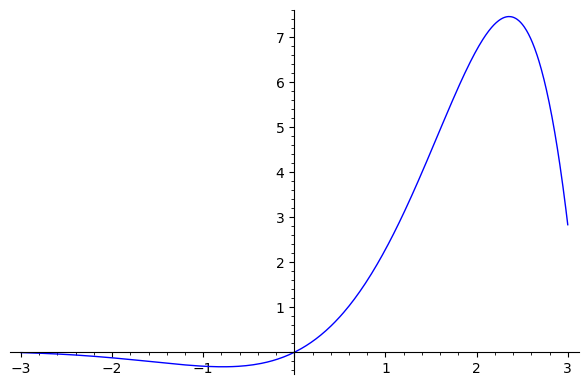

In [21]:
plot(f,(-3,3))

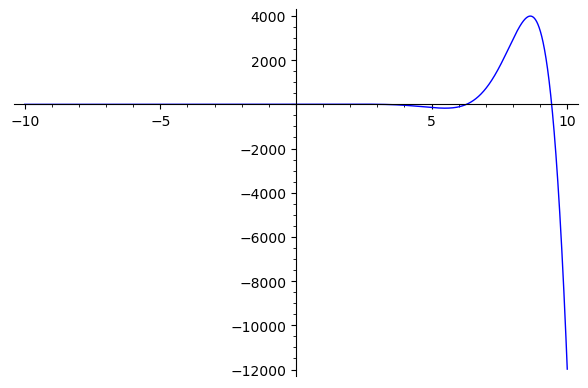

In [22]:
plot(f,(-10,10))

In [23]:
f.limit(x=-oo)

x |--> 0

In [24]:
f.limit(x=oo)

x |--> und

In [25]:
f.find_root(0,10)

0.0

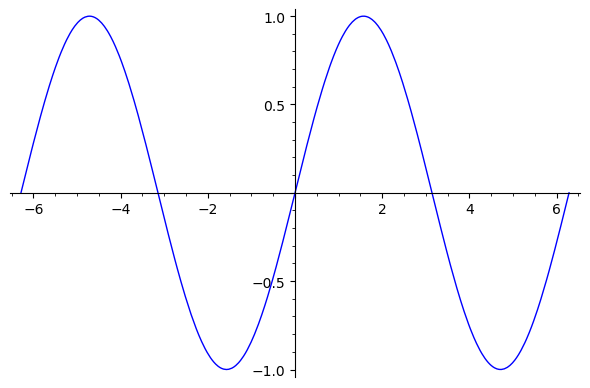

In [26]:
plot(sin,(-2*pi,2*pi))

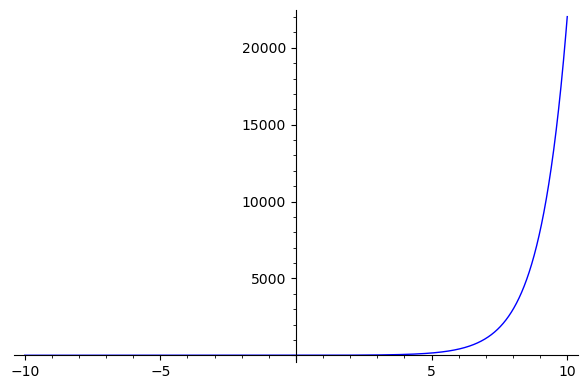

In [27]:
plot(exp,(-10,10))

In [28]:
show("Les racine sont de la forme Z*pi où Z est un entier relatif")

'Les racine sont de la forme Z*pi où Z est un entier relatif'

### Question
On définit le polynôme 
$$P(X) = \frac{(X-a)(X-b)}{(c-a)(c-b)} +  \frac{(X-a)(X-c)}{(b-a)(b-c)} + \frac{(X-b)(X-c)}{(a-b)(a-c)}-1.$$
1. Définir les variables `a`, `b` et `c` et le polynôme $P(X)$. **Attention** ne pas copié-coller le polynôme.
1. Afficher le polynôme $P$ et vérifier qu'il est bien équivalent à celui que vous avez saisi.
1. Calculer $P(a)$, $P(b)$ et $P(c)$.
1. Vérifier que le degré du polynôme $P$ est bien 2. **Attention** $P$ est une fonction symbolique, ce qui implique que le polynôme est bien $P(X)$.
1. Un polynôme de degré $d$ a au plus $d$ racines. Expliquer d'où vient la contradiction apparente des deux questions précédentes. *En utilisant les simplifications d'expression symbolique vue en cours trouver une autre forme pour $P(X)$.*

In [17]:
var('a b c')

(a, b, c)

In [18]:
P(X)= ((X-a)*(X-b))/((c-a)*(c-b))+((X-a)*(X-c))/((b-a)*(b-c))+((X-b)*(X-c))/((a-b)*(a-c))-1

In [28]:
P

X |--> (X - b)*(X - c)/((a - b)*(a - c)) - (X - a)*(X - c)/((a - b)*(b - c)) + (X - a)*(X - b)/((a - c)*(b - c)) - 1

In [20]:
P(a),P(b),P(c)

(0, 0, 0)

In [23]:
P.expand()

X |--> X^2/((a - b)*(a - c)) - X^2/((a - b)*(b - c)) + X^2/((a - c)*(b - c)) + X*a/((a - b)*(b - c)) - X*a/((a - c)*(b - c)) - X*b/((a - b)*(a - c)) - X*b/((a - c)*(b - c)) + a*b/((a - c)*(b - c)) - X*c/((a - b)*(a - c)) + X*c/((a - b)*(b - c)) - a*c/((a - b)*(b - c)) + b*c/((a - b)*(a - c)) - 1

In [24]:
show(P.simplify_full())

show("Le polynôme se simplifie en 0, cela veut dire que peu importe la valeur de x, il renverra 0.")

0

'Le polynôme se simplifie en 0, cela veut dire que peu importe la valeur de x, il renverra 0.'

### Question
Soit $C$ la courbe du plan définie par
$$\begin{cases}
    x(t) & = t^3-2t\\
    y(t) & = t^2-t
\end{cases}$$
pour $t\in\mathbb{R}$.

1. Définir les fonctions $x(t)$ et $y(t)$.
1. Tracer la courbe $C$ à l'aide de `parametric_plot`. *Vous partirez de l'intervalle $[-10,10]$ pour les valeurs de $t$ et vous devrez l'affiner afin de trouver de meilleures bornes pour que la représentation soit « intéressante »*. Vous devrez voir qu'il y a plusieurs racines.
1. Déterminer les valeurs de $t$ auxquelles la courbe coupe l'axe des abscisses, et celui des ordonnées. En déduire les coordonnées auxquelles la courbe coupe chacun des axes. *Utiliser `solve`. On peut extraire la « partie droite » d'une équation `eq` avec `eq.rhs()` (rhs = right-hand side).*
1. Déterminer les points du plan où la courbe admet une tangente horizontale, et ceux où elle admet une tangente verticale. *Utiliser les dérivées de $x(t)$ et $y(t)$.*
1. Déterminer les *points doubles* (points par lesquels la courbe passe deux fois). *Il faut déterminer les couples $(s,t)$ tels que $x(s) = x(t)$ et $y(s) = y(t)$ (et $s\neq t$). Pour cela, on peut résoudre $(x(s)-x(t))/(s-t) = 0$ et $(y(s)-y(t))/(s-t) = 0$.*
1. Représenter, sur un même graphique, la courbe $C$, et les différents points déterminés dans les questions précédentes, en les distinguant par des couleurs différentes. *`point((x,y), color='...', size='...')` permet de tracer un point de coordonnées $(x,y)$ avec la couleur souhaitée et une taille souhaitée. De même, `points(L, ...)` trace une liste de points. On peut superposer des graphiques en effectuant leur somme.*

In [35]:
x(t)=t^3-2*t

In [36]:
y(t)=t^2-t

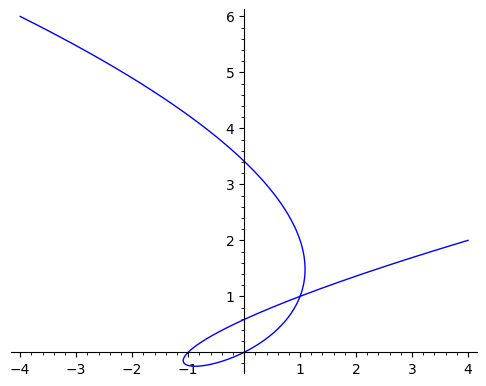

In [37]:
parametric_plot((x,y),(-2,2))

In [38]:
solve(x(t)==0,t),solve(y(t)==0,t)

([t == -sqrt(2), t == sqrt(2), t == 0], [t == 0, t == 1])

In [39]:
xx=[s.rhs() for s in solve(x(t)==0,t)]
yy=[s.rhs() for s in solve(y(t)==0,t)]
xx,yy

([-sqrt(2), sqrt(2), 0], [0, 1])

In [40]:
Sol1=[]
for ab in xx:
    Sol1.append((x(ab),y(ab)))
for ordo in yy:
    if (x(ordo),y(ordo)) not in Sol1:
        Sol1.append((x(ordo),y(ordo)))
Sol1

[(0, sqrt(2) + 2), (0, -sqrt(2) + 2), (0, 0), (-1, 0)]

In [41]:
derivX=[s.rhs() for s in solve(x.derivative()(t)==0,t)]
derivY=[s.rhs() for s in solve(y.derivative()(t)==0,t)]

derivX,derivY

([-1/3*sqrt(3)*sqrt(2), 1/3*sqrt(3)*sqrt(2)], [1/2])

In [42]:
Sol=[]
for tang in derivX:
    Sol.append((x(tang),y(tang)))
for tang in derivY:
    if (x(tang),y(tang)) not in Sol:
        Sol.append((x(tang),y(tang)))
Sol

[(4/9*sqrt(3)*sqrt(2), 1/3*sqrt(3)*sqrt(2) + 2/3),
 (-4/9*sqrt(3)*sqrt(2), -1/3*sqrt(3)*sqrt(2) + 2/3),
 (-7/8, -1/4)]

In [43]:
var('s')
eq=solve([(x(s)-x(t))/(s-t),(y(s)-y(t))/(s-t)],s,t)
eq

Sol2=[]
for ele in eq:
    for el in ele:
        Sol2.append(el.rhs())
Sol2

[-1/2*sqrt(5) + 1/2, 1/2*sqrt(5) + 1/2, 1/2*sqrt(5) + 1/2, -1/2*sqrt(5) + 1/2]

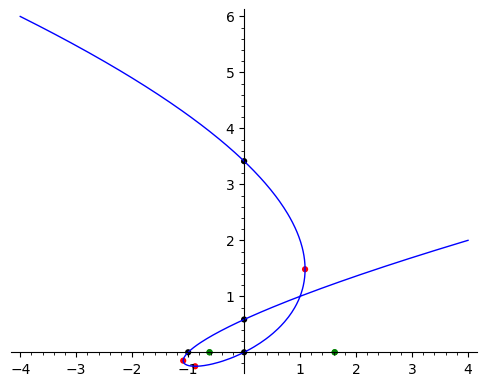

In [44]:
g1=parametric_plot((x,y),(-2,2))

g1+= point(Sol1,color='black',size=20)

g1+= point(Sol,color='red',size=20)

g1+= point(Sol2,color='green',size=20)

g1

### Question
On veut résoudre le problème suivant, posé comme énigme dans le journal Le Monde :
> Quel est la taille maximale d'un ensemble $X$ d'entiers compris entre $1$ et $100$ tels que quelque soit $a$ et $b\in X$, $a-b$ n'est pas un carré parfait ?

On modélise le problème par un graphe $G$ dont les sommets sont les entiers entre $1$ et $100$, et il y a une arête entre deux sommets si leur différence n'est pas un carré.

1. Trouver comment tester si un entier $k$ est un carré. *Définir un entier sage `k=ZZ(...)` puis explorer les méthodes associées à `k` en tapant `k.<tab>`¹. En général, les méthodes pour tester une propriété s'appellent `is_...`.*
1. Définir l'ensemble $A$ des arêtes comme la liste des couples $(i,j)$, $1≤i<j≤100$, tels que $j-i$ n'est pas un carré. Le nombre d'arêtes dans $A$ doit être de 4335. 
1. Définir un graphe vide $G$ (`Graph()`), puis ajouter les arêtes définies à la question précédente (`G.add_edges(...)`).
1. La question posée dans l'énigme revient à trouver une *clique* la plus grande possible dans $G$, c'est-à-dire un sous-ensemble des sommets de $G$ tel qu'il y a une arête entre chaque couple de sommets. Calculer une clique maximale. *Chercher avec `G.<tab>` une méthode pour calculer une clique maximale. On peut également chercher en faisant par exemple `G.cl<tab>` pour avoir toutes les méthodes qui commencent par `cl`.* **Attention** il y a plusieurs fonctions pour cacluler des cliques, lisez bien la documentation pour trouver celle qui ne renvoie qu'une seule clique.
1. On généralise le problème en remplaçant $100$ par un entier $n$ quelconque. Observer la croissance de la taille du plus grand ensemble en fonction de $n$ (en utilisant `list_plot` pour n allant de 1 à 100).


¹ `<tab>` veut dire « appuyer sur tabulation », il ne faut pas taper ces 5 caractères !

In [45]:
k=ZZ(100)
k.is_square()

True

In [46]:
A=[]
for i in range(1,101):
    for j in range(i+1,101):
        if not (ZZ(j-i).is_square()):
            A.append((i,j))
len(A)

4335

In [47]:
G=Graph()
G.add_edges(A)

In [48]:
G.clique_maximum()

[11,
 46,
 83,
 88,
 1,
 4,
 6,
 16,
 18,
 28,
 33,
 35,
 38,
 48,
 56,
 59,
 61,
 66,
 76,
 78,
 90,
 93,
 96,
 98]

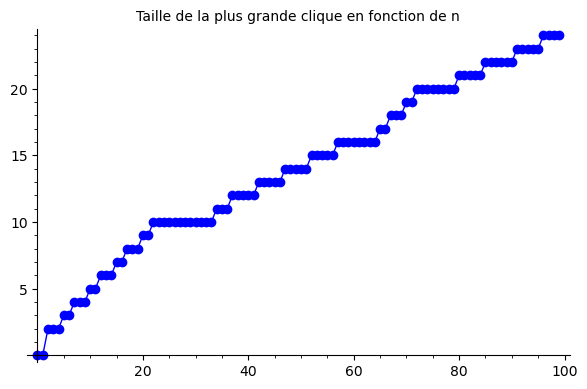

In [49]:
max_clique_sizes = []
for n in range(1, 101):
    A_n = [(i, j) for i in range(1, n+1) for j in range(i+1, n+1) if not ZZ(j - i).is_square()]
    G_n = Graph()
    G_n.add_edges(A_n)
    max_clique_sizes.append(len(G_n.clique_maximum()))
list_plot(max_clique_sizes, plotjoined=True, marker='o', title='Taille de la plus grande clique en fonction de n')


## Un problème
<small>Problème inspiré de : C. Gomez, B. Salvy, et P. Zimmermann, *Calcul formel: mode d’emploi ; exemples en Maple*. Masson, 1995.</small>


![Figure](data:image/svg+xml;base64,PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0iVVRGLTgiIHN0YW5kYWxvbmU9Im5vIj8%2BCjwhLS0gQ3JlYXRlZCB3aXRoIElua3NjYXBlIChodHRwOi8vd3d3Lmlua3NjYXBlLm9yZy8pIC0tPgoKPHN2ZwogICB2ZXJzaW9uPSIxLjEiCiAgIGlkPSJzdmc4NTQiCiAgIHhtbDpzcGFjZT0icHJlc2VydmUiCiAgIHdpZHRoPSI1NzcuNzA0NjUiCiAgIGhlaWdodD0iNTM4LjQxOTI1IgogICB2aWV3Qm94PSIwIDAgNTc3LjcwNDY1IDUzOC40MTkyNSIKICAgeG1sbnM9Imh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIgogICB4bWxuczpzdmc9Imh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIj48ZGVmcwogICAgIGlkPSJkZWZzODU4Ij48bWFya2VyCiAgICAgICBzdHlsZT0ib3ZlcmZsb3c6dmlzaWJsZSIKICAgICAgIGlkPSJBcnJvdzFNZW5kIgogICAgICAgcmVmWD0iMCIKICAgICAgIHJlZlk9IjAiCiAgICAgICBvcmllbnQ9ImF1dG8iPjxwYXRoCiAgICAgICAgIHRyYW5zZm9ybT0ibWF0cml4KC0wLjQsMCwwLC0wLjQsLTQsMCkiCiAgICAgICAgIHN0eWxlPSJmaWxsOmNvbnRleHQtc3Ryb2tlO2ZpbGwtcnVsZTpldmVub2RkO3N0cm9rZTpjb250ZXh0LXN0cm9rZTtzdHJva2Utd2lkdGg6MXB0IgogICAgICAgICBkPSJNIDAsMCA1LC01IC0xMi41LDAgNSw1IFoiCiAgICAgICAgIGlkPSJwYXRoMjEwMyIgLz48L21hcmtlcj48bWFya2VyCiAgICAgICBzdHlsZT0ib3ZlcmZsb3c6dmlzaWJsZSIKICAgICAgIGlkPSJBcnJvdzFTZW5kIgogICAgICAgcmVmWD0iMCIKICAgICAgIHJlZlk9IjAiCiAgICAgICBvcmllbnQ9ImF1dG8iPjxwYXRoCiAgICAgICAgIHRyYW5zZm9ybT0ibWF0cml4KC0wLjIsMCwwLC0wLjIsLTEuMiwwKSIKICAgICAgICAgc3R5bGU9ImZpbGw6Y29udGV4dC1zdHJva2U7ZmlsbC1ydWxlOmV2ZW5vZGQ7c3Ryb2tlOmNvbnRleHQtc3Ryb2tlO3N0cm9rZS13aWR0aDoxcHQiCiAgICAgICAgIGQ9Ik0gMCwwIDUsLTUgLTEyLjUsMCA1LDUgWiIKICAgICAgICAgaWQ9InBhdGgyMTA5IiAvPjwvbWFya2VyPjxtYXJrZXIKICAgICAgIHN0eWxlPSJvdmVyZmxvdzp2aXNpYmxlIgogICAgICAgaWQ9IkFycm93MUxlbmQiCiAgICAgICByZWZYPSIwIgogICAgICAgcmVmWT0iMCIKICAgICAgIG9yaWVudD0iYXV0byI%2BPHBhdGgKICAgICAgICAgdHJhbnNmb3JtPSJtYXRyaXgoLTAuOCwwLDAsLTAuOCwtMTAsMCkiCiAgICAgICAgIHN0eWxlPSJmaWxsOmNvbnRleHQtc3Ryb2tlO2ZpbGwtcnVsZTpldmVub2RkO3N0cm9rZTpjb250ZXh0LXN0cm9rZTtzdHJva2Utd2lkdGg6MXB0IgogICAgICAgICBkPSJNIDAsMCA1LC01IC0xMi41LDAgNSw1IFoiCiAgICAgICAgIGlkPSJwYXRoMjA5NyIgLz48L21hcmtlcj48Y2xpcFBhdGgKICAgICAgIGNsaXBQYXRoVW5pdHM9InVzZXJTcGFjZU9uVXNlIgogICAgICAgaWQ9ImNsaXBQYXRoODgyIj48cGF0aAogICAgICAgICBkPSJNIDAsMCBIIDI0MyBWIDIxMyBIIDAgWiIKICAgICAgICAgaWQ9InBhdGg4ODAiIC8%2BPC9jbGlwUGF0aD48Y2xpcFBhdGgKICAgICAgIGNsaXBQYXRoVW5pdHM9InVzZXJTcGFjZU9uVXNlIgogICAgICAgaWQ9ImNsaXBQYXRoODk4Ij48cGF0aAogICAgICAgICBkPSJNIDAsMjEzMCBWIDAgSCAyNDMwIFYgMjEzMCBaIE0gMjI1Mi4yLDEwMzAgSCAyNDI1IHYgNzIgaCAtMTcyLjggdiAwIGwgMTQ0LC0zNiB6IgogICAgICAgICBjbGlwLXJ1bGU9ImV2ZW5vZGQiCiAgICAgICAgIGlkPSJwYXRoODk2IiAvPjwvY2xpcFBhdGg%2BPGNsaXBQYXRoCiAgICAgICBjbGlwUGF0aFVuaXRzPSJ1c2VyU3BhY2VPblVzZSIKICAgICAgIGlkPSJjbGlwUGF0aDkxMCI%2BPHBhdGgKICAgICAgICAgZD0iTSAwLDIxMzAgViAwIEggMjQzMCBWIDIxMzAgWiBNIDEwOTMsMTk0Ni4yIFYgMjExOSBoIC03MiB2IC0xNzIuOCAwIGwgMzYsMTQ0IHoiCiAgICAgICAgIGNsaXAtcnVsZT0iZXZlbm9kZCIKICAgICAgICAgaWQ9InBhdGg5MDgiIC8%2BPC9jbGlwUGF0aD48bWFya2VyCiAgICAgICBzdHlsZT0ib3ZlcmZsb3c6dmlzaWJsZSIKICAgICAgIGlkPSJBcnJvdzFNZW5kLTAiCiAgICAgICByZWZYPSIwIgogICAgICAgcmVmWT0iMCIKICAgICAgIG9yaWVudD0iYXV0byI%2BPHBhdGgKICAgICAgICAgdHJhbnNmb3JtPSJtYXRyaXgoLTAuNCwwLDAsLTAuNCwtNCwwKSIKICAgICAgICAgc3R5bGU9ImZpbGw6Y29udGV4dC1zdHJva2U7ZmlsbC1ydWxlOmV2ZW5vZGQ7c3Ryb2tlOmNvbnRleHQtc3Ryb2tlO3N0cm9rZS13aWR0aDoxcHQiCiAgICAgICAgIGQ9Ik0gMCwwIDUsLTUgLTEyLjUsMCA1LDUgWiIKICAgICAgICAgaWQ9InBhdGgyMTAzLTQiIC8%2BPC9tYXJrZXI%2BPC9kZWZzPjxnCiAgICAgaWQ9Imc4NjAiCiAgICAgdHJhbnNmb3JtPSJtYXRyaXgoMS4zMzMzMzMzLDAsMCwtMS4zMzMzMzMzLC0xMjUuNDczNTQsMTAyNy4wMjY5KSI%2BPHBhdGgKICAgICAgIGlkPSJwYXRoODg4LTAiCiAgICAgICBzdHlsZT0iZmlsbDojZTAxYjI0O2ZpbGwtb3BhY2l0eTowLjU7c3Ryb2tlOiNlMDFiMjQ7c3Ryb2tlLXdpZHRoOjAuOTtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2UtbWl0ZXJsaW1pdDoxMDtzdHJva2UtZGFzaGFycmF5Om5vbmU7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICAgIGQ9Ik0gMzM2LjcxNzI3LDY4MC40NjQ5NyAyNTAuNjY5MjEsNTcyLjE0MTQ1IDMzNi43MTcyNyw0NjMuODE3OTYgYyAzMS44OTcyNywyNS4zNDQzIDUyLjM3MjMxLDY0LjQzMjQ1IDUyLjM3MjMxLDEwOC4zMjM0OSAwLDQzLjg5MDUxIC0yMC40NzUwNCw4Mi45NzkwNCAtNTIuMzcyMzEsMTA4LjMyMzUyIHoiIC8%2BPHBhdGgKICAgICAgIGQ9Im0gMzg5LjA4OTU4LDU3Mi4xNDE0NSBjIDAsLTc2LjQwNTQxIC02MS45NzM4OCwtMTM4LjM0NDI0IC0xMzguNDIwMzcsLTEzOC4zNDQyNCAtNzYuNDQ3NDYsMCAtMTM4LjQyMDM3LDYxLjkzODgzIC0xMzguNDIwMzcsMTM4LjM0NDI0IDAsNzYuNDA0NDYgNjEuOTcyOTEsMTM4LjM0NDI1IDEzOC40MjAzNywxMzguMzQ0MjUgNzYuNDQ2NDksMCAxMzguNDIwMzcsLTYxLjkzOTc5IDEzOC40MjAzNywtMTM4LjM0NDI1IHoiCiAgICAgICBzdHlsZT0iZmlsbDpub25lO3N0cm9rZTojZTAxYjI0O3N0cm9rZS13aWR0aDowLjk7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlLW1pdGVybGltaXQ6MTA7c3Ryb2tlLWRhc2hhcnJheTpub25lO3N0cm9rZS1vcGFjaXR5OjEiCiAgICAgICBpZD0icGF0aDg4OCIgLz48cGF0aAogICAgICAgaWQ9InBhdGg4OTAtOTYiCiAgICAgICBzdHlsZT0iZmlsbDojMWE1ZmI0O2ZpbGwtb3BhY2l0eTowLjU7c3Ryb2tlOiMxYzcxZDg7c3Ryb2tlLXdpZHRoOjAuOTtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2UtbWl0ZXJsaW1pdDoxMDtzdHJva2UtZGFzaGFycmF5Om5vbmU7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICAgIGQ9Ik0gMzM2LjcyODU2LDY4MC40NzkwMyBDIDI5Ni45ODkwMyw2NjAuNjIxMjEgMjY5LjcwMDg5LDYxOS41NjYgMjY5LjcwMDg5LDU3Mi4xNDE0NSBjIDAsLTQ3LjM4MzQ4IDI3LjI0MDQ4LC04OC40MDk1NSA2Ni45MjM0NywtMTA4LjI4NjkgMC4wMzQsLTAuMDE3MyAwLjA3MDIsLTAuMDMxIDAuMTA0MiwtMC4wNDc4IGwgNTIuMzYxMDIsMTA4LjMzNDc1IHoiIC8%2BPHBhdGgKICAgICAgIGQ9Im0gNTExLjkzNzY4LDU3Mi4xNDE0OSBjIDAsLTY2Ljg1Mzc0IC01NC4yMjc4OSwtMTIxLjA1MTIyIC0xMjEuMTE3ODMsLTEyMS4wNTEyMiAtMTkuNDgwOCwwIC0zNy44ODc2Myw0LjU5Njk3IC01NC4xOTM3MSwxMi43NjQ3NCAtMzkuNjgyOTgsMTkuODc3MzYgLTY2LjkyNDExLDYwLjkwMyAtNjYuOTI0MTEsMTA4LjI4NjQ4IDAsNDcuNDI0NTUgMjcuMjg4ODYsODguNDgwNzQgNjcuMDI4MzksMTA4LjMzODU2IDE2LjI4MDI1LDguMTM1MjEgMzQuNjUwMTQsMTIuNzEyNjYgNTQuMDg5NDMsMTIuNzEyNjYgNjYuODg5OTQsMCAxMjEuMTE3ODMsLTU0LjE5ODA3IDEyMS4xMTc4MywtMTIxLjA1MTIyIHoiCiAgICAgICBzdHlsZT0iZmlsbDpub25lO3N0cm9rZTojMWM3MWQ4O3N0cm9rZS13aWR0aDowLjk7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlLW1pdGVybGltaXQ6MTA7c3Ryb2tlLWRhc2hhcnJheTpub25lO3N0cm9rZS1vcGFjaXR5OjEiCiAgICAgICBpZD0icGF0aDg5MCIgLz48cGF0aAogICAgICAgZD0iTSA5NC4xMDUxNTgsNTcyLjE0MTM5IEggNTI1LjAxNTA0IgogICAgICAgc3R5bGU9ImZpbGw6IzlhOTk5NjtzdHJva2U6IzlhOTk5NjtzdHJva2Utd2lkdGg6MC40NTAwMDAwMTtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2UtbWl0ZXJsaW1pdDoxMDtzdHJva2UtZGFzaGFycmF5Om5vbmU7c3Ryb2tlLW9wYWNpdHk6MTttYXJrZXItZW5kOnVybCgjQXJyb3cxTWVuZCkiCiAgICAgICBpZD0icGF0aDkwMCIgLz48cGF0aAogICAgICAgZD0iTSAyNTAuNjY5MjEsMzY2LjQ1NTc3IFYgNzY5LjM4MzQiCiAgICAgICBzdHlsZT0iZmlsbDpub25lO3N0cm9rZTojOWE5OTk2O3N0cm9rZS13aWR0aDowLjQ0OTk5OTtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2UtbWl0ZXJsaW1pdDoxMDtzdHJva2UtZGFzaGFycmF5Om5vbmU7c3Ryb2tlLW9wYWNpdHk6MTttYXJrZXItZW5kOnVybCgjQXJyb3cxTWVuZCkiCiAgICAgICBpZD0icGF0aDkxMiIgLz48dGV4dAogICAgICAgdHJhbnNmb3JtPSJzY2FsZSgxLjAwMDI3NTEsLTAuOTk5NzI1KSIKICAgICAgIHN0eWxlPSJmb250LXZhcmlhbnQ6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXNpemU6MTcuMjMzMnB4O2ZvbnQtZmFtaWx5OkNNTUk5Oy1pbmtzY2FwZS1mb250LXNwZWNpZmljYXRpb246Q01NSTk7d3JpdGluZy1tb2RlOmxyLXRiO2ZpbGw6IzAwMDAwMDtmaWxsLW9wYWNpdHk6MTtmaWxsLXJ1bGU6bm9uemVybztzdHJva2U6bm9uZTtzdHJva2Utd2lkdGg6MSIKICAgICAgIGlkPSJ0ZXh0OTM2IgogICAgICAgeD0iMTU4LjEyNjMxIgogICAgICAgeT0iLTUxOS41OTgyNyI%2BPHRzcGFuCiAgICAgICAgIHg9IjE1OC4xMjYzMSIKICAgICAgICAgeT0iLTUxOS41OTgyNyIKICAgICAgICAgaWQ9InRzcGFuOTM0IgogICAgICAgICBzdHlsZT0iZmlsbDojMDAwMDAwO3N0cm9rZS13aWR0aDoxIj5SPC90c3Bhbj48L3RleHQ%2BPHRleHQKICAgICAgIHRyYW5zZm9ybT0ic2NhbGUoMS4wMDAyNzUxLC0wLjk5OTcyNSkiCiAgICAgICBzdHlsZT0iZm9udC12YXJpYW50Om5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zaXplOjExLjQ4ODhweDtmb250LWZhbWlseTpDTVI2Oy1pbmtzY2FwZS1mb250LXNwZWNpZmljYXRpb246Q01SNjt3cml0aW5nLW1vZGU6bHItdGI7ZmlsbDojMDAwMDAwO2ZpbGwtb3BhY2l0eToxO2ZpbGwtcnVsZTpub256ZXJvO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDoxIgogICAgICAgaWQ9InRleHQ5NDAiCiAgICAgICB4PSIxNzEuNTI4MjMiCiAgICAgICB5PSItNTE3LjY4MzkiPjx0c3BhbgogICAgICAgICB4PSIxNzEuNTI4MjMiCiAgICAgICAgIHk9Ii01MTcuNjgzOSIKICAgICAgICAgaWQ9InRzcGFuOTM4IgogICAgICAgICBzdHlsZT0iZmlsbDojMDAwMDAwO3N0cm9rZS13aWR0aDoxIj4xPC90c3Bhbj48L3RleHQ%2BPHRleHQKICAgICAgIHRyYW5zZm9ybT0ic2NhbGUoMS4wMDAyNzUxLC0wLjk5OTcyNSkiCiAgICAgICBzdHlsZT0iZm9udC12YXJpYW50Om5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zaXplOjE3LjIzMzJweDtmb250LWZhbWlseTpDTU1JOTstaW5rc2NhcGUtZm9udC1zcGVjaWZpY2F0aW9uOkNNTUk5O3dyaXRpbmctbW9kZTpsci10YjtmaWxsOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7ZmlsbC1ydWxlOm5vbnplcm87c3Ryb2tlOm5vbmU7c3Ryb2tlLXdpZHRoOjEiCiAgICAgICBpZD0idGV4dDkzNi00IgogICAgICAgeD0iNDI2LjA1OTc1IgogICAgICAgeT0iLTUyNS45OTIyNSI%2BPHRzcGFuCiAgICAgICAgIHg9IjQyNi4wNTk3NSIKICAgICAgICAgeT0iLTUyNS45OTIyNSIKICAgICAgICAgaWQ9InRzcGFuOTM0LTQiCiAgICAgICAgIHN0eWxlPSJmaWxsOiMwMDAwMDA7c3Ryb2tlLXdpZHRoOjEiPlI8L3RzcGFuPjwvdGV4dD48dGV4dAogICAgICAgdHJhbnNmb3JtPSJzY2FsZSgxLjAwMDI3NTEsLTAuOTk5NzI1KSIKICAgICAgIHN0eWxlPSJmb250LXZhcmlhbnQ6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXNpemU6MTEuNDg4OHB4O2ZvbnQtZmFtaWx5OkNNUjY7LWlua3NjYXBlLWZvbnQtc3BlY2lmaWNhdGlvbjpDTVI2O3dyaXRpbmctbW9kZTpsci10YjtmaWxsOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7ZmlsbC1ydWxlOm5vbnplcm87c3Ryb2tlOm5vbmU7c3Ryb2tlLXdpZHRoOjEiCiAgICAgICBpZD0idGV4dDk0MC03IgogICAgICAgeD0iNDM5LjQ2MTciCiAgICAgICB5PSItNTI0LjA3Nzk0Ij48dHNwYW4KICAgICAgICAgeD0iNDM5LjQ2MTciCiAgICAgICAgIHk9Ii01MjQuMDc3OTQiCiAgICAgICAgIGlkPSJ0c3BhbjkzOC02IgogICAgICAgICBzdHlsZT0iZmlsbDojMDAwMDAwO3N0cm9rZS13aWR0aDoxIj4yPC90c3Bhbj48L3RleHQ%2BPGcKICAgICAgIGlkPSJnMTM1NzQxIgogICAgICAgdHJhbnNmb3JtPSJtYXRyaXgoMS45MjI1MDUxLDAsMCwxLjkyMTQ0NzksLTI4Ny40NzYsLTUxOS4zNDA4MykiCiAgICAgICBzdHlsZT0ic3Ryb2tlLXdpZHRoOjAuNTIwMjk4Ij48dGV4dAogICAgICAgICB0cmFuc2Zvcm09InNjYWxlKDEsLTEpIgogICAgICAgICBzdHlsZT0iZm9udC12YXJpYW50Om5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zaXplOjguOTY2NHB4O2ZvbnQtZmFtaWx5OkNNTUk5Oy1pbmtzY2FwZS1mb250LXNwZWNpZmljYXRpb246Q01NSTk7d3JpdGluZy1tb2RlOmxyLXRiO2ZpbGw6I2E1MWQyZDtmaWxsLW9wYWNpdHk6MTtmaWxsLXJ1bGU6bm9uemVybztzdHJva2U6bm9uZTtzdHJva2Utd2lkdGg6MC41MjAyOTgiCiAgICAgICAgIGlkPSJ0ZXh0OTQ0IgogICAgICAgICB4PSIyOTQuOTY2IgogICAgICAgICB5PSItNTcyLjQ4Mjk3Ij48dHNwYW4KICAgICAgICAgICB4PSIyOTQuOTY2IgogICAgICAgICAgIHk9Ii01NzIuNDgyOTciCiAgICAgICAgICAgaWQ9InRzcGFuOTQyIgogICAgICAgICAgIHN0eWxlPSJmaWxsOiNhNTFkMmQ7c3Ryb2tlLXdpZHRoOjAuNTIwMjk4Ij7OuDwvdHNwYW4%2BPC90ZXh0Pjx0ZXh0CiAgICAgICAgIHRyYW5zZm9ybT0ic2NhbGUoMSwtMSkiCiAgICAgICAgIHN0eWxlPSJmb250LXZhcmlhbnQ6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXNpemU6NS45Nzc2cHg7Zm9udC1mYW1pbHk6Q01SNjstaW5rc2NhcGUtZm9udC1zcGVjaWZpY2F0aW9uOkNNUjY7d3JpdGluZy1tb2RlOmxyLXRiO2ZpbGw6I2E1MWQyZDtmaWxsLW9wYWNpdHk6MTtmaWxsLXJ1bGU6bm9uemVybztzdHJva2U6bm9uZTtzdHJva2Utd2lkdGg6MC41MjAyOTgiCiAgICAgICAgIGlkPSJ0ZXh0OTQ4IgogICAgICAgICB4PSIyOTkuMjc4OTkiCiAgICAgICAgIHk9Ii01NzEuNDg2MDIiPjx0c3BhbgogICAgICAgICAgIHg9IjI5OS4yNzg5OSIKICAgICAgICAgICB5PSItNTcxLjQ4NjAyIgogICAgICAgICAgIGlkPSJ0c3Bhbjk0NiIKICAgICAgICAgICBzdHlsZT0iZmlsbDojYTUxZDJkO3N0cm9rZS13aWR0aDowLjUyMDI5OCI%2BMTwvdHNwYW4%2BPC90ZXh0PjwvZz48ZwogICAgICAgaWQ9ImcxMzU3NDEtNCIKICAgICAgIHRyYW5zZm9ybT0ibWF0cml4KDEuOTIyNTA1MSwwLDAsMS45MjE0NDc5LC0yMDYuODI5MzgsLTUyMS4yMzI2NykiCiAgICAgICBzdHlsZT0iZmlsbDojMWE1ZmI0O3N0cm9rZS13aWR0aDowLjUyMDI5OCI%2BPHRleHQKICAgICAgICAgdHJhbnNmb3JtPSJzY2FsZSgxLC0xKSIKICAgICAgICAgc3R5bGU9ImZvbnQtdmFyaWFudDpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc2l6ZTo4Ljk2NjRweDtmb250LWZhbWlseTpDTU1JOTstaW5rc2NhcGUtZm9udC1zcGVjaWZpY2F0aW9uOkNNTUk5O3dyaXRpbmctbW9kZTpsci10YjtmaWxsOiMxYTVmYjQ7ZmlsbC1vcGFjaXR5OjE7ZmlsbC1ydWxlOm5vbnplcm87c3Ryb2tlOm5vbmU7c3Ryb2tlLXdpZHRoOjAuNTIwMjk4IgogICAgICAgICBpZD0idGV4dDk0NC04IgogICAgICAgICB4PSIyOTQuOTY2IgogICAgICAgICB5PSItNTcyLjQ4Mjk3Ij48dHNwYW4KICAgICAgICAgICB4PSIyOTQuOTY2IgogICAgICAgICAgIHk9Ii01NzIuNDgyOTciCiAgICAgICAgICAgaWQ9InRzcGFuOTQyLTEiCiAgICAgICAgICAgc3R5bGU9ImZpbGw6IzFhNWZiNDtzdHJva2Utd2lkdGg6MC41MjAyOTgiPs64PC90c3Bhbj48L3RleHQ%2BPHRleHQKICAgICAgICAgdHJhbnNmb3JtPSJzY2FsZSgxLC0xKSIKICAgICAgICAgc3R5bGU9ImZvbnQtdmFyaWFudDpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc2l6ZTo1Ljk3NzZweDtmb250LWZhbWlseTpDTVI2Oy1pbmtzY2FwZS1mb250LXNwZWNpZmljYXRpb246Q01SNjt3cml0aW5nLW1vZGU6bHItdGI7ZmlsbDojMWE1ZmI0O2ZpbGwtb3BhY2l0eToxO2ZpbGwtcnVsZTpub256ZXJvO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDowLjUyMDI5OCIKICAgICAgICAgaWQ9InRleHQ5NDgtMCIKICAgICAgICAgeD0iMjk5LjI3ODk5IgogICAgICAgICB5PSItNTcxLjQ4NjAyIj48dHNwYW4KICAgICAgICAgICB4PSIyOTkuMjc4OTkiCiAgICAgICAgICAgeT0iLTU3MS40ODYwMiIKICAgICAgICAgICBpZD0idHNwYW45NDYtMyIKICAgICAgICAgICBzdHlsZT0iZmlsbDojMWE1ZmI0O3N0cm9rZS13aWR0aDowLjUyMDI5OCI%2BMjwvdHNwYW4%2BPC90ZXh0PjwvZz48dGV4dAogICAgICAgdHJhbnNmb3JtPSJzY2FsZSgxLjAwMDI3NTEsLTAuOTk5NzI1KSIKICAgICAgIHN0eWxlPSJmb250LXZhcmlhbnQ6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXNpemU6MTcuMjMzMnB4O2ZvbnQtZmFtaWx5OkNNTUk5Oy1pbmtzY2FwZS1mb250LXNwZWNpZmljYXRpb246Q01NSTk7d3JpdGluZy1tb2RlOmxyLXRiO2ZpbGw6IzAwMDAwMDtmaWxsLW9wYWNpdHk6MTtmaWxsLXJ1bGU6bm9uemVybztzdHJva2U6bm9uZTtzdHJva2Utd2lkdGg6MSIKICAgICAgIGlkPSJ0ZXh0OTU2IgogICAgICAgeD0iMzM0LjMxNDQ1IgogICAgICAgeT0iLTY5NC43OTU5NiI%2BPHRzcGFuCiAgICAgICAgIHg9IjMzNC4zMTQ0NSIKICAgICAgICAgeT0iLTY5NC43OTU5NiIKICAgICAgICAgaWQ9InRzcGFuOTUwIgogICAgICAgICBzdHlsZT0iZmlsbDojMDAwMDAwO3N0cm9rZS13aWR0aDoxIj5JPC90c3Bhbj48L3RleHQ%2BPHRleHQKICAgICAgIHRyYW5zZm9ybT0ic2NhbGUoMS4wMDAyNzUxLC0wLjk5OTcyNSkiCiAgICAgICBzdHlsZT0iZm9udC12YXJpYW50Om5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zaXplOjE3LjIzMzJweDtmb250LWZhbWlseTpDTU1JOTstaW5rc2NhcGUtZm9udC1zcGVjaWZpY2F0aW9uOkNNTUk5O3dyaXRpbmctbW9kZTpsci10YjtmaWxsOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7ZmlsbC1ydWxlOm5vbnplcm87c3Ryb2tlOm5vbmU7c3Ryb2tlLXdpZHRoOjEiCiAgICAgICBpZD0idGV4dDk1Ni04IgogICAgICAgeD0iMzM0LjI1OCIKICAgICAgIHk9Ii00NDQuNDA1NzkiPjx0c3BhbgogICAgICAgICB4PSIzMzQuMjU4IgogICAgICAgICB5PSItNDQ0LjQwNTc5IgogICAgICAgICBpZD0idHNwYW45NTAtNSIKICAgICAgICAgc3R5bGU9ImZpbGw6IzAwMDAwMDtzdHJva2Utd2lkdGg6MSI%2BSjwvdHNwYW4%2BPC90ZXh0Pjx0ZXh0CiAgICAgICB0cmFuc2Zvcm09InNjYWxlKDEuMDAwMjc1MSwtMC45OTk3MjUpIgogICAgICAgc3R5bGU9ImZvbnQtdmFyaWFudDpub3JtYWw7Zm9udC13ZWlnaHQ6bm9ybWFsO2ZvbnQtc2l6ZToxNi45Njg2cHg7Zm9udC1mYW1pbHk6Q01NSTk7LWlua3NjYXBlLWZvbnQtc3BlY2lmaWNhdGlvbjpDTU1JOTt3cml0aW5nLW1vZGU6bHItdGI7ZmlsbDojOWE5OTk2O2ZpbGwtb3BhY2l0eToxO2ZpbGwtcnVsZTpub256ZXJvO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDoxIgogICAgICAgaWQ9InRleHQ5NjgiCiAgICAgICB4PSIyMjguMzEwNzMiCiAgICAgICB5PSItNTgxLjUzNzA1Ij48dHNwYW4KICAgICAgICAgeD0iMjYwLjY2NDMxIgogICAgICAgICB5PSItNzU1LjIyMzUxIgogICAgICAgICBpZD0idHNwYW45NjQiCiAgICAgICAgIHN0eWxlPSJmaWxsOiM5YTk5OTY7c3Ryb2tlLXdpZHRoOjEiPnk8L3RzcGFuPjwvdGV4dD48dGV4dAogICAgICAgdHJhbnNmb3JtPSJzY2FsZSgxLjAwMDI3NTEsLTAuOTk5NzI1KSIKICAgICAgIHN0eWxlPSJmb250LXZhcmlhbnQ6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXNpemU6MTYuOTY4NnB4O2ZvbnQtZmFtaWx5OkNNTUk5Oy1pbmtzY2FwZS1mb250LXNwZWNpZmljYXRpb246Q01NSTk7d3JpdGluZy1tb2RlOmxyLXRiO2ZpbGw6IzlhOTk5NjtmaWxsLW9wYWNpdHk6MTtmaWxsLXJ1bGU6bm9uemVybztzdHJva2U6bm9uZTtzdHJva2Utd2lkdGg6MSIKICAgICAgIGlkPSJ0ZXh0OTY4LTkiCiAgICAgICB4PSI0ODUuMzk4MTkiCiAgICAgICB5PSItMzgyLjc3Njc2Ij48dHNwYW4KICAgICAgICAgeD0iNTE3Ljc1MTc3IgogICAgICAgICB5PSItNTU2LjQ2MzIiCiAgICAgICAgIGlkPSJ0c3Bhbjk2NC04IgogICAgICAgICBzdHlsZT0iZmlsbDojOWE5OTk2O3N0cm9rZS13aWR0aDoxIj54PC90c3Bhbj48L3RleHQ%2BPHRleHQKICAgICAgIHRyYW5zZm9ybT0ic2NhbGUoMS4wMDAyNzUxLC0wLjk5OTcyNSkiCiAgICAgICBzdHlsZT0iZm9udC12YXJpYW50Om5vcm1hbDtmb250LXdlaWdodDpub3JtYWw7Zm9udC1zaXplOjE3LjIzMzJweDtmb250LWZhbWlseTpDTU1JOTstaW5rc2NhcGUtZm9udC1zcGVjaWZpY2F0aW9uOkNNTUk5O3dyaXRpbmctbW9kZTpsci10YjtmaWxsOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7ZmlsbC1ydWxlOm5vbnplcm87c3Ryb2tlOm5vbmU7c3Ryb2tlLXdpZHRoOjEiCiAgICAgICBpZD0idGV4dDk1Ni02IgogICAgICAgeD0iMjMxLjAxOTczIgogICAgICAgeT0iLTU4MC42Mjg0MiI%2BPHRzcGFuCiAgICAgICAgIHg9IjIzMS4wMTk3MyIKICAgICAgICAgeT0iLTU4MC42Mjg0MiIKICAgICAgICAgaWQ9InRzcGFuOTUwLTEiCiAgICAgICAgIHN0eWxlPSJmaWxsOiMwMDAwMDA7c3Ryb2tlLXdpZHRoOjEiPk88L3RzcGFuPjwvdGV4dD48dGV4dAogICAgICAgdHJhbnNmb3JtPSJzY2FsZSgxLjAwMDI3NTEsLTAuOTk5NzI1KSIKICAgICAgIHN0eWxlPSJmb250LXZhcmlhbnQ6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXNpemU6MTcuMjMzMnB4O2ZvbnQtZmFtaWx5OkNNTUk5Oy1pbmtzY2FwZS1mb250LXNwZWNpZmljYXRpb246Q01NSTk7d3JpdGluZy1tb2RlOmxyLXRiO2ZpbGw6IzAwMDAwMDtmaWxsLW9wYWNpdHk6MTtmaWxsLXJ1bGU6bm9uemVybztzdHJva2U6bm9uZTtzdHJva2Utd2lkdGg6MSIKICAgICAgIGlkPSJ0ZXh0OTU2LTYtMSIKICAgICAgIHg9IjM5MS40ODQyOCIKICAgICAgIHk9Ii01NzguMzU0MDYiPjx0c3BhbgogICAgICAgICB4PSIzOTEuNDg0MjgiCiAgICAgICAgIHk9Ii01NzguMzU0MDYiCiAgICAgICAgIGlkPSJ0c3Bhbjk1MC0xLTUiCiAgICAgICAgIHN0eWxlPSJmaWxsOiMwMDAwMDA7c3Ryb2tlLXdpZHRoOjEiPk88L3RzcGFuPjwvdGV4dD48dGV4dAogICAgICAgdHJhbnNmb3JtPSJzY2FsZSgxLjAwMDI3NTEsLTAuOTk5NzI1KSIKICAgICAgIHN0eWxlPSJmb250LXZhcmlhbnQ6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXNpemU6MTcuMjMzMnB4O2ZvbnQtZmFtaWx5OkNNTUk5Oy1pbmtzY2FwZS1mb250LXNwZWNpZmljYXRpb246Q01NSTk7d3JpdGluZy1tb2RlOmxyLXRiO2ZpbGw6IzAwMDAwMDtmaWxsLW9wYWNpdHk6MTtmaWxsLXJ1bGU6bm9uemVybztzdHJva2U6bm9uZTtzdHJva2Utd2lkdGg6MSIKICAgICAgIGlkPSJ0ZXh0OTgwIgogICAgICAgeD0iNDkxLjg5MDk2IgogICAgICAgeT0iLTU4Ny4wNDQyNSI%2BPHRzcGFuCiAgICAgICAgIHg9IjM0My4xNjY0NyIKICAgICAgICAgeT0iLTU1NC4xODYxIgogICAgICAgICBpZD0idHNwYW45NzYiCiAgICAgICAgIHN0eWxlPSJmaWxsOiMwMDAwMDA7c3Ryb2tlLXdpZHRoOjEiPkg8L3RzcGFuPjwvdGV4dD48dGV4dAogICAgICAgdHJhbnNmb3JtPSJzY2FsZSgxLjAwMDI3NTEsLTAuOTk5NzI1KSIKICAgICAgIHN0eWxlPSJmb250LXZhcmlhbnQ6bm9ybWFsO2ZvbnQtd2VpZ2h0Om5vcm1hbDtmb250LXNpemU6MTEuNDg4OHB4O2ZvbnQtZmFtaWx5OkNNUjY7LWlua3NjYXBlLWZvbnQtc3BlY2lmaWNhdGlvbjpDTVI2O3dyaXRpbmctbW9kZTpsci10YjtmaWxsOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7ZmlsbC1ydWxlOm5vbnplcm87c3Ryb2tlOm5vbmU7c3Ryb2tlLXdpZHRoOjEiCiAgICAgICBpZD0idGV4dDk4NCIKICAgICAgIHg9IjQwNS4wNjU3IgogICAgICAgeT0iLTU3Ni40ODEwOCI%2BPHRzcGFuCiAgICAgICAgIHg9IjQwNS4wNjU3IgogICAgICAgICB5PSItNTc2LjQ4MTA4IgogICAgICAgICBpZD0idHNwYW45ODIiCiAgICAgICAgIHN0eWxlPSJmaWxsOiMwMDAwMDA7c3Ryb2tlLXdpZHRoOjEiPjI8L3RzcGFuPjwvdGV4dD48cGF0aAogICAgICAgc3R5bGU9ImZpbGw6bm9uZTtmaWxsLXJ1bGU6ZXZlbm9kZDtzdHJva2U6IzVlNWM2NDtzdHJva2Utd2lkdGg6MC43NTAwMDRweDtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2Utb3BhY2l0eToxIgogICAgICAgZD0ibSAzMzYuNzE3MjcsNjgwLjQ2NDk3IDAuMDEzNCwtMjE2LjY2MjExIgogICAgICAgaWQ9InBhdGg4OTYxNiIgLz48cGF0aAogICAgICAgc3R5bGU9ImZpbGw6IzlhOTk5NjtmaWxsLW9wYWNpdHk6MTtmaWxsLXJ1bGU6ZXZlbm9kZDtzdHJva2U6bm9uZTtzdHJva2Utd2lkdGg6MC43NXB4O3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0cm9rZS1vcGFjaXR5OjEiCiAgICAgICBkPSJtIDI1MC42Njk2OSw3NzAuMjc0MzIgLTEuMTQxNzIsLTQuMDA1OSAwLjkxMDIyLDAuOTE3MjEgaCAwLjQ2MDU5IGwgMC45MTM2NywtMC45MTY3NCB6IgogICAgICAgaWQ9InBhdGgxMzY5IiAvPjxwYXRoCiAgICAgICBzdHlsZT0iZmlsbDojOWE5OTk2O2ZpbGwtb3BhY2l0eToxO2ZpbGwtcnVsZTpldmVub2RkO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDowLjc1cHg7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICAgIGQ9Im0gMjUwLjY2OTY5LDc3MC4yNzQzMiAtMy40MjUxNiwtMTIuMDE3NyAzLjIwMTg4LDIuNzUxNjMgaCAwLjQ1NzUgbCAzLjE5NDA2LC0yLjc1MDIyIHoiCiAgICAgICBpZD0icGF0aDEzNjktMyIgLz48cGF0aAogICAgICAgc3R5bGU9ImZpbGw6IzlhOTk5NjtmaWxsLW9wYWNpdHk6MTtmaWxsLXJ1bGU6ZXZlbm9kZDtzdHJva2U6bm9uZTtzdHJva2Utd2lkdGg6MC43NXB4O3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0cm9rZS1vcGFjaXR5OjEiCiAgICAgICBkPSJtIDUyNy4zODM2Niw1NzIuMzc1NzEgLTEyLjAxNzcsMy40MjUxNiAyLjc1MTYzLC0zLjIwMTg4IHYgLTAuNDU3NSBsIC0yLjc1MDIyLC0zLjE5NDA2IHoiCiAgICAgICBpZD0icGF0aDEzNjktMy02IiAvPjxnCiAgICAgICBpZD0iZzM5NTgiPjxwYXRoCiAgICAgICAgIGQ9Im0gMzk4LjIzMDE2LDU2Ny4yNzQxMyA4OS40NDk0MywtNDcuMjk0NzkiCiAgICAgICAgIHN0eWxlPSJmaWxsOm5vbmU7c3Ryb2tlOiMwMDAwMDA7c3Ryb2tlLXdpZHRoOjAuNDQ5OTk5O3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0cm9rZS1taXRlcmxpbWl0OjEwO3N0cm9rZS1kYXNoYXJyYXk6bm9uZTtzdHJva2Utb3BhY2l0eToxIgogICAgICAgICBpZD0icGF0aDkyMC00IiAvPjxwYXRoCiAgICAgICAgIHN0eWxlPSJmaWxsOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7ZmlsbC1ydWxlOmV2ZW5vZGQ7c3Ryb2tlOm5vbmU7c3Ryb2tlLXdpZHRoOjAuNzVweDtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2Utb3BhY2l0eToxIgogICAgICAgICBkPSJtIDQ5My42MDYwNyw1MTYuNzc5MzYgLTYuNzI4Miw2LjUyNDUyIDAuNjgzMzYsLTMuMDkxNzEgMC4xMTgzNiwtMC4yMzI4MyAtMC4yODA1NiwtMC4wNjk1IC0yLjk1MDA4LC0xLjEzNTkgeiIKICAgICAgICAgaWQ9InBhdGgxMzY5LTMtNy01IiAvPjwvZz48ZwogICAgICAgaWQ9ImczOTU4LTMiCiAgICAgICB0cmFuc2Zvcm09Im1hdHJpeCgtMC4zMTkzMTE4OCwtMS4xMTIxOTU2LDEuMTEwMTc1OSwtMC4zMTk4OTI3OCwtMjU3LjEzNjAzLDExOTMuMDU5NikiCiAgICAgICBzdHlsZT0ic3Ryb2tlLXdpZHRoOjAuODY0ODc2Ij48cGF0aAogICAgICAgICBkPSJtIDM5OC4yMzAxNiw1NjcuMjc0MTMgODkuNDQ5NDMsLTQ3LjI5NDc5IgogICAgICAgICBzdHlsZT0iZmlsbDpub25lO3N0cm9rZTojMDAwMDAwO3N0cm9rZS13aWR0aDowLjM4OTE5NDtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2UtbWl0ZXJsaW1pdDoxMDtzdHJva2UtZGFzaGFycmF5Om5vbmU7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICAgICAgaWQ9InBhdGg5MjAtNC01IiAvPjxwYXRoCiAgICAgICAgIHN0eWxlPSJmaWxsOiMwMDAwMDA7ZmlsbC1vcGFjaXR5OjE7ZmlsbC1ydWxlOmV2ZW5vZGQ7c3Ryb2tlOm5vbmU7c3Ryb2tlLXdpZHRoOjAuNjQ4NjU3cHg7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICAgICAgZD0ibSA0OTMuNjA2MDcsNTE2Ljc3OTM2IC02LjcyODIsNi41MjQ1MiAwLjY4MzM2LC0zLjA5MTcxIDAuMTE4MzYsLTAuMjMyODMgLTAuMjgwNTYsLTAuMDY5NSAtMi45NTAwOCwtMS4xMzU5IHoiCiAgICAgICAgIGlkPSJwYXRoMTM2OS0zLTctNS02IiAvPjwvZz48L2c%2BPC9zdmc%2B)

L'objectif du problème est de déterminer une expression pour l'aire de l'intersection des deux cercles rouge et bleu. Les points de la figure sont définis de la manière suivante :
- le cercle $C_1$ (rouge) est un cercle de rayon $R_1$ centré en l'origine $O$ ;
- le cercle $C_2$ (bleu) est un cercle de rayon $R_2$ dont le centre est à l'intersection $O_2$ entre l'axe des abscisses et le cercle $C_1$ ;
- $I$ et $J$ sont les points d'intersection de $C_1$ et $C_2$ ;
- $H$ est l'intersection entre le segment $[IJ]$ et l'axe des abscisses, $[IJ]$ étant vertical ;
- $\theta_1$ est l'angle $\widehat{IOH}$ et $\theta_2$ l'angle $\widehat{IO_2H}$.

Pour calculer l'aire de l'intersection des deux cercles, on utilise l'idée suivante, illustrée ci-dessous. Le segment $[IJ]$ coupe la zone d'intersection en deux. L'aire de la partie droite s'obtient comme la différence entre l'aire du *secteur angulaire* $OIJ$ du cercle $C_1$ (zone rouge) et le triangle $OIJ$. Celle de la partie gauche s'obtient comme la différence entre l'aire du *secteur angulaire* $O_2IJ$ du cercle $C_2$ (zone bleue) et le triangle $O_2IJ$. 

![Calcul](data:image/svg+xml;base64,PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0iVVRGLTgiIHN0YW5kYWxvbmU9Im5vIj8%2BCjwhLS0gQ3JlYXRlZCB3aXRoIElua3NjYXBlIChodHRwOi8vd3d3Lmlua3NjYXBlLm9yZy8pIC0tPgoKPHN2ZwogICB2ZXJzaW9uPSIxLjEiCiAgIGlkPSJzdmc4NTQiCiAgIHhtbDpzcGFjZT0icHJlc2VydmUiCiAgIHdpZHRoPSI1NzQuMzY5MiIKICAgaGVpZ2h0PSIxNTQuMDUyMDYiCiAgIHZpZXdCb3g9IjAgMCA1NzQuMzY5MiAxNTQuMDUyMDYiCiAgIHNvZGlwb2RpOmRvY25hbWU9IlNvbW1lLnN2ZyIKICAgaW5rc2NhcGU6dmVyc2lvbj0iMS4xICgxOjEuMSsyMDIxMDUyNjE1MTcrY2U2NjYzYjNiNykiCiAgIHhtbG5zOmlua3NjYXBlPSJodHRwOi8vd3d3Lmlua3NjYXBlLm9yZy9uYW1lc3BhY2VzL2lua3NjYXBlIgogICB4bWxuczpzb2RpcG9kaT0iaHR0cDovL3NvZGlwb2RpLnNvdXJjZWZvcmdlLm5ldC9EVEQvc29kaXBvZGktMC5kdGQiCiAgIHhtbG5zPSJodHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyIKICAgeG1sbnM6c3ZnPSJodHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyI%2BPGRlZnMKICAgICBpZD0iZGVmczg1OCI%2BPGxpbmVhckdyYWRpZW50CiAgICAgICBpZD0ibGluZWFyR3JhZGllbnQ0NDIzNCIKICAgICAgIGlua3NjYXBlOnN3YXRjaD0ic29saWQiPjxzdG9wCiAgICAgICAgIHN0eWxlPSJzdG9wLWNvbG9yOiMxYTVmYjQ7c3RvcC1vcGFjaXR5OjE7IgogICAgICAgICBvZmZzZXQ9IjAiCiAgICAgICAgIGlkPSJzdG9wNDQyMzIiIC8%2BPC9saW5lYXJHcmFkaWVudD48bWFya2VyCiAgICAgICBzdHlsZT0ib3ZlcmZsb3c6dmlzaWJsZSIKICAgICAgIGlkPSJBcnJvdzFNZW5kIgogICAgICAgcmVmWD0iMCIKICAgICAgIHJlZlk9IjAiCiAgICAgICBvcmllbnQ9ImF1dG8iCiAgICAgICBpbmtzY2FwZTpzdG9ja2lkPSJBcnJvdzFNZW5kIgogICAgICAgaW5rc2NhcGU6aXNzdG9jaz0idHJ1ZSI%2BPHBhdGgKICAgICAgICAgdHJhbnNmb3JtPSJtYXRyaXgoLTAuNCwwLDAsLTAuNCwtNCwwKSIKICAgICAgICAgc3R5bGU9ImZpbGw6Y29udGV4dC1zdHJva2U7ZmlsbC1ydWxlOmV2ZW5vZGQ7c3Ryb2tlOmNvbnRleHQtc3Ryb2tlO3N0cm9rZS13aWR0aDoxcHQiCiAgICAgICAgIGQ9Ik0gMCwwIDUsLTUgLTEyLjUsMCA1LDUgWiIKICAgICAgICAgaWQ9InBhdGgyMTAzIiAvPjwvbWFya2VyPjxtYXJrZXIKICAgICAgIHN0eWxlPSJvdmVyZmxvdzp2aXNpYmxlIgogICAgICAgaWQ9IkFycm93MVNlbmQiCiAgICAgICByZWZYPSIwIgogICAgICAgcmVmWT0iMCIKICAgICAgIG9yaWVudD0iYXV0byIKICAgICAgIGlua3NjYXBlOnN0b2NraWQ9IkFycm93MVNlbmQiCiAgICAgICBpbmtzY2FwZTppc3N0b2NrPSJ0cnVlIj48cGF0aAogICAgICAgICB0cmFuc2Zvcm09Im1hdHJpeCgtMC4yLDAsMCwtMC4yLC0xLjIsMCkiCiAgICAgICAgIHN0eWxlPSJmaWxsOmNvbnRleHQtc3Ryb2tlO2ZpbGwtcnVsZTpldmVub2RkO3N0cm9rZTpjb250ZXh0LXN0cm9rZTtzdHJva2Utd2lkdGg6MXB0IgogICAgICAgICBkPSJNIDAsMCA1LC01IC0xMi41LDAgNSw1IFoiCiAgICAgICAgIGlkPSJwYXRoMjEwOSIgLz48L21hcmtlcj48bWFya2VyCiAgICAgICBzdHlsZT0ib3ZlcmZsb3c6dmlzaWJsZSIKICAgICAgIGlkPSJBcnJvdzFMZW5kIgogICAgICAgcmVmWD0iMCIKICAgICAgIHJlZlk9IjAiCiAgICAgICBvcmllbnQ9ImF1dG8iCiAgICAgICBpbmtzY2FwZTpzdG9ja2lkPSJBcnJvdzFMZW5kIgogICAgICAgaW5rc2NhcGU6aXNzdG9jaz0idHJ1ZSI%2BPHBhdGgKICAgICAgICAgdHJhbnNmb3JtPSJtYXRyaXgoLTAuOCwwLDAsLTAuOCwtMTAsMCkiCiAgICAgICAgIHN0eWxlPSJmaWxsOmNvbnRleHQtc3Ryb2tlO2ZpbGwtcnVsZTpldmVub2RkO3N0cm9rZTpjb250ZXh0LXN0cm9rZTtzdHJva2Utd2lkdGg6MXB0IgogICAgICAgICBkPSJNIDAsMCA1LC01IC0xMi41LDAgNSw1IFoiCiAgICAgICAgIGlkPSJwYXRoMjA5NyIgLz48L21hcmtlcj48Y2xpcFBhdGgKICAgICAgIGNsaXBQYXRoVW5pdHM9InVzZXJTcGFjZU9uVXNlIgogICAgICAgaWQ9ImNsaXBQYXRoODgyIj48cGF0aAogICAgICAgICBkPSJNIDAsMCBIIDI0MyBWIDIxMyBIIDAgWiIKICAgICAgICAgaWQ9InBhdGg4ODAiIC8%2BPC9jbGlwUGF0aD48Y2xpcFBhdGgKICAgICAgIGNsaXBQYXRoVW5pdHM9InVzZXJTcGFjZU9uVXNlIgogICAgICAgaWQ9ImNsaXBQYXRoODk4Ij48cGF0aAogICAgICAgICBkPSJNIDAsMjEzMCBWIDAgSCAyNDMwIFYgMjEzMCBaIE0gMjI1Mi4yLDEwMzAgSCAyNDI1IHYgNzIgaCAtMTcyLjggdiAwIGwgMTQ0LC0zNiB6IgogICAgICAgICBjbGlwLXJ1bGU9ImV2ZW5vZGQiCiAgICAgICAgIGlkPSJwYXRoODk2IiAvPjwvY2xpcFBhdGg%2BPGNsaXBQYXRoCiAgICAgICBjbGlwUGF0aFVuaXRzPSJ1c2VyU3BhY2VPblVzZSIKICAgICAgIGlkPSJjbGlwUGF0aDkxMCI%2BPHBhdGgKICAgICAgICAgZD0iTSAwLDIxMzAgViAwIEggMjQzMCBWIDIxMzAgWiBNIDEwOTMsMTk0Ni4yIFYgMjExOSBoIC03MiB2IC0xNzIuOCAwIGwgMzYsMTQ0IHoiCiAgICAgICAgIGNsaXAtcnVsZT0iZXZlbm9kZCIKICAgICAgICAgaWQ9InBhdGg5MDgiIC8%2BPC9jbGlwUGF0aD48bWFya2VyCiAgICAgICBzdHlsZT0ib3ZlcmZsb3c6dmlzaWJsZSIKICAgICAgIGlkPSJBcnJvdzFNZW5kLTAiCiAgICAgICByZWZYPSIwIgogICAgICAgcmVmWT0iMCIKICAgICAgIG9yaWVudD0iYXV0byIKICAgICAgIGlua3NjYXBlOnN0b2NraWQ9IkFycm93MU1lbmQiCiAgICAgICBpbmtzY2FwZTppc3N0b2NrPSJ0cnVlIj48cGF0aAogICAgICAgICB0cmFuc2Zvcm09Im1hdHJpeCgtMC40LDAsMCwtMC40LC00LDApIgogICAgICAgICBzdHlsZT0iZmlsbDpjb250ZXh0LXN0cm9rZTtmaWxsLXJ1bGU6ZXZlbm9kZDtzdHJva2U6Y29udGV4dC1zdHJva2U7c3Ryb2tlLXdpZHRoOjFwdCIKICAgICAgICAgZD0iTSAwLDAgNSwtNSAtMTIuNSwwIDUsNSBaIgogICAgICAgICBpZD0icGF0aDIxMDMtNCIgLz48L21hcmtlcj48L2RlZnM%2BPHNvZGlwb2RpOm5hbWVkdmlldwogICAgIGlkPSJuYW1lZHZpZXc4NTYiCiAgICAgcGFnZWNvbG9yPSIjNTA1MDUwIgogICAgIGJvcmRlcmNvbG9yPSIjZWVlZWVlIgogICAgIGJvcmRlcm9wYWNpdHk9IjEiCiAgICAgaW5rc2NhcGU6cGFnZXNoYWRvdz0iMCIKICAgICBpbmtzY2FwZTpwYWdlb3BhY2l0eT0iMCIKICAgICBpbmtzY2FwZTpwYWdlY2hlY2tlcmJvYXJkPSIwIgogICAgIHNob3dncmlkPSJmYWxzZSIKICAgICBpbmtzY2FwZTpzbmFwLWJib3g9InRydWUiCiAgICAgaW5rc2NhcGU6em9vbT0iMS40MTQyMTM2IgogICAgIGlua3NjYXBlOmN4PSIyNzkuMzA3MTgiCiAgICAgaW5rc2NhcGU6Y3k9IjU5LjA0MzQxNiIKICAgICBpbmtzY2FwZTp3aW5kb3ctd2lkdGg9IjE5MjAiCiAgICAgaW5rc2NhcGU6d2luZG93LWhlaWdodD0iMTA1NyIKICAgICBpbmtzY2FwZTp3aW5kb3cteD0iMCIKICAgICBpbmtzY2FwZTp3aW5kb3cteT0iMjMiCiAgICAgaW5rc2NhcGU6d2luZG93LW1heGltaXplZD0iMSIKICAgICBpbmtzY2FwZTpjdXJyZW50LWxheWVyPSJnODYwIiAvPjxnCiAgICAgaWQ9Imc4NjAiCiAgICAgaW5rc2NhcGU6Z3JvdXBtb2RlPSJsYXllciIKICAgICBpbmtzY2FwZTpsYWJlbD0iR29tZXogZXQgYWwuIC0gMTk5NSAtIENhbGN1bCBmb3JtZWwgbW9kZSBkJ2VtcGxvaSA7IGV4ZW1wbGVzIGVuIE1hcGxlIgogICAgIHRyYW5zZm9ybT0ibWF0cml4KDEuMzMzMzMzMywwLDAsLTEuMzMzMzMzMywtMTA0Mi40MjA4LDgzNC44NDA5NSkiPjxnCiAgICAgICBpZD0iZzQ0NDE1IgogICAgICAgdHJhbnNmb3JtPSJtYXRyaXgoMC40OTkxMDEwMSwwLDAsMC40OTU2NTQ5Niw0NTcuODY5NDEsMjg2LjY0OTI4KSIKICAgICAgIHN0eWxlPSJzdHJva2Utd2lkdGg6Mi4wMTA1NiI%2BPHBhdGgKICAgICAgICAgaWQ9InBhdGg4ODgtMC0yIgogICAgICAgICBzdHlsZT0iZmlsbDojZTAxYjI0O2ZpbGwtb3BhY2l0eTowLjU7c3Ryb2tlOiNlMDFiMjQ7c3Ryb2tlLXdpZHRoOjEuODA5NTtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2UtbWl0ZXJsaW1pdDoxMDtzdHJva2UtZGFzaGFycmF5Om5vbmU7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICAgICAgZD0iTSA3MTYuOTgwNDksNjc2LjY4NjQ4IFYgNDYwLjAzOTQ2IGMgMzEuODk3MjcsMjUuMzQ0MyA1Mi4zNzIzMSw2NC40MzI0NiA1Mi4zNzIzMSwxMDguMzIzNSAwLDQzLjg5MDUxIC0yMC40NzUwNCw4Mi45NzkwNCAtNTIuMzcyMzEsMTA4LjMyMzUyIHoiCiAgICAgICAgIHNvZGlwb2RpOm5vZGV0eXBlcz0iY2NzYyIgLz48cGF0aAogICAgICAgICBpZD0icGF0aDg5MC05Ni05IgogICAgICAgICBzdHlsZT0iZmlsbDojMWE1ZmI0O2ZpbGwtb3BhY2l0eTowLjU7c3Ryb2tlOiMxYzcxZDg7c3Ryb2tlLXdpZHRoOjEuODA5NTtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2UtbWl0ZXJsaW1pdDoxMDtzdHJva2UtZGFzaGFycmF5Om5vbmU7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICAgICAgZD0ibSA3MTYuOTkxNzgsNjc2LjY5NzMgYyAtMzkuNzM5NTMsLTE5Ljg1NzgxIC02Ny4wMjc2NywtNjAuOTEzMDIgLTY3LjAyNzY3LC0xMDguMzM3NTggMCwtNDcuMzgzNDcgMjcuMjQwNDgsLTg4LjQwOTU0IDY2LjkyMzQ3LC0xMDguMjg2OSAwLjAzNCwtMC4wMTczIDAuMDcwMiwtMC4wMzEgMC4xMDQyLC0wLjA0NzggeiIKICAgICAgICAgc29kaXBvZGk6bm9kZXR5cGVzPSJjc2NjYyIgLz48cGF0aAogICAgICAgICBzdHlsZT0iZmlsbDpub25lO2ZpbGwtcnVsZTpldmVub2RkO3N0cm9rZTojNWU1YzY0O3N0cm9rZS13aWR0aDoxLjUwNzkycHg7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICAgICAgZD0ibSA3MTYuOTgwNDksNjc2LjY5NDAzIDAuMDEzNCwtMjE2LjY2MjExIgogICAgICAgICBpZD0icGF0aDg5NjE2LTEiIC8%2BPC9nPjx0ZXh0CiAgICAgICB4bWw6c3BhY2U9InByZXNlcnZlIgogICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtdmFyaWFudDpub3JtYWw7Zm9udC13ZWlnaHQ6Ym9sZDtmb250LXN0cmV0Y2g6bm9ybWFsO2ZvbnQtc2l6ZToyNC44Njg3cHg7bGluZS1oZWlnaHQ6MTAwJTtmb250LWZhbWlseTpzYW5zLXNlcmlmOy1pbmtzY2FwZS1mb250LXNwZWNpZmljYXRpb246J3NhbnMtc2VyaWYgQm9sZCc7bGV0dGVyLXNwYWNpbmc6MHB4O3dvcmQtc3BhY2luZzowcHg7ZmlsbDojMDAwMDAwO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDowLjc1MDAwMnB4O3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0cm9rZS1vcGFjaXR5OjEiCiAgICAgICB4PSI4NDYuNDYwNDUiCiAgICAgICB5PSItNTYyLjU0OTkzIgogICAgICAgaWQ9InRleHQ4MjYzIgogICAgICAgdHJhbnNmb3JtPSJzY2FsZSgxLjAwMzQ3MDIsLTAuOTk2NTQxOCkiPjx0c3BhbgogICAgICAgICBzb2RpcG9kaTpyb2xlPSJsaW5lIgogICAgICAgICBpZD0idHNwYW44MjYxIgogICAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC12YXJpYW50Om5vcm1hbDtmb250LXdlaWdodDpib2xkO2ZvbnQtc3RyZXRjaDpub3JtYWw7Zm9udC1zaXplOjI0Ljg2ODdweDtmb250LWZhbWlseTpzYW5zLXNlcmlmOy1pbmtzY2FwZS1mb250LXNwZWNpZmljYXRpb246J3NhbnMtc2VyaWYgQm9sZCc7ZmlsbDojMDAwMDAwO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDowLjc1MDAwMnB4IgogICAgICAgICB4PSI4NDYuNDYwNDUiCiAgICAgICAgIHk9Ii01NjIuNTQ5OTMiPj08L3RzcGFuPjwvdGV4dD48dGV4dAogICAgICAgeG1sOnNwYWNlPSJwcmVzZXJ2ZSIKICAgICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1hbDtmb250LXZhcmlhbnQ6bm9ybWFsO2ZvbnQtd2VpZ2h0OmJvbGQ7Zm9udC1zdHJldGNoOm5vcm1hbDtmb250LXNpemU6MjQuODY4N3B4O2xpbmUtaGVpZ2h0OjEwMCU7Zm9udC1mYW1pbHk6c2Fucy1zZXJpZjstaW5rc2NhcGUtZm9udC1zcGVjaWZpY2F0aW9uOidzYW5zLXNlcmlmIEJvbGQnO2xldHRlci1zcGFjaW5nOjBweDt3b3JkLXNwYWNpbmc6MHB4O2ZpbGw6IzAwMDAwMDtzdHJva2U6bm9uZTtzdHJva2Utd2lkdGg6MC43NTAwMDJweDtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2Utb3BhY2l0eToxIgogICAgICAgeD0iMTA0NS4zNjE5IgogICAgICAgeT0iLTU2Mi41Mzc3OCIKICAgICAgIGlkPSJ0ZXh0ODI2My01LTciCiAgICAgICB0cmFuc2Zvcm09InNjYWxlKDEuMDAzNDcwMiwtMC45OTY1NDE4KSI%2BPHRzcGFuCiAgICAgICAgIHNvZGlwb2RpOnJvbGU9ImxpbmUiCiAgICAgICAgIGlkPSJ0c3BhbjgyNjEtNi00IgogICAgICAgICBzdHlsZT0iZm9udC1zdHlsZTpub3JtYWw7Zm9udC12YXJpYW50Om5vcm1hbDtmb250LXdlaWdodDpib2xkO2ZvbnQtc3RyZXRjaDpub3JtYWw7Zm9udC1zaXplOjI0Ljg2ODdweDtmb250LWZhbWlseTpzYW5zLXNlcmlmOy1pbmtzY2FwZS1mb250LXNwZWNpZmljYXRpb246J3NhbnMtc2VyaWYgQm9sZCc7ZmlsbDojMDAwMDAwO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDowLjc1MDAwMnB4IgogICAgICAgICB4PSIxMDQ1LjM2MTkiCiAgICAgICAgIHk9Ii01NjIuNTM3NzgiPis8L3RzcGFuPjwvdGV4dD48cGF0aAogICAgICAgaWQ9InBhdGg4ODgtMC0yNyIKICAgICAgIHN0eWxlPSJmaWxsOiNlMDFiMjQ7ZmlsbC1vcGFjaXR5OjAuNTtzdHJva2U6I2UwMWIyNDtzdHJva2Utd2lkdGg6MC45O3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0cm9rZS1taXRlcmxpbWl0OjEwO3N0cm9rZS1kYXNoYXJyYXk6bm9uZTtzdHJva2Utb3BhY2l0eToxIgogICAgICAgZD0ibSA5MzAuODkxNTUsNjIyLjA1MjI5IC00Mi45NDY2OCwtNTMuNjkxMDkgNDIuOTQ2NjgsLTUzLjY5MTA4IGMgMTUuOTE5OTYsMTIuNTYyMDMgMjYuMTM5MDYsMzEuOTM2MjYgMjYuMTM5MDYsNTMuNjkxMDggMCwyMS43NTQ1NCAtMTAuMjE5MSw0MS4xMjg5NyAtMjYuMTM5MDYsNTMuNjkxMDkgeiIgLz48cGF0aAogICAgICAgaWQ9InBhdGg4ODgtMC0wIgogICAgICAgc3R5bGU9ImZvbnQtdmFyaWF0aW9uLXNldHRpbmdzOm5vcm1hbDt2ZWN0b3ItZWZmZWN0Om5vbmU7ZmlsbDojZTAxYjI0O2ZpbGwtb3BhY2l0eTowLjU7c3Ryb2tlOiNlMDFiMjQ7c3Ryb2tlLXdpZHRoOjAuOTtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2UtbWl0ZXJsaW1pdDoxMDtzdHJva2UtZGFzaGFycmF5Om5vbmU7c3Ryb2tlLWRhc2hvZmZzZXQ6MDtzdHJva2Utb3BhY2l0eToxOy1pbmtzY2FwZS1zdHJva2U6bm9uZTtzdG9wLWNvbG9yOiMwMDAwMDAiCiAgICAgICBkPSJNIDEwMjUuOTA5LDYyMi4wNTIyOSA5ODIuOTYyMzYsNTY4LjM2MTIgMTAyNS45MDksNTE0LjY3MDEyIFoiCiAgICAgICBzb2RpcG9kaTpub2RldHlwZXM9ImNjY2MiIC8%2BPGcKICAgICAgIGFyaWEtbGFiZWw9IigiCiAgICAgICB0cmFuc2Zvcm09InNjYWxlKDAuNDY0MDMwNTksLTIuMTU1MDMwMykiCiAgICAgICBpZD0idGV4dDgyNjMtMyIKICAgICAgIHN0eWxlPSJmb250LXdlaWdodDpib2xkO2ZvbnQtc2l6ZTo2MHB4O2xpbmUtaGVpZ2h0OjEwMCU7LWlua3NjYXBlLWZvbnQtc3BlY2lmaWNhdGlvbjonc2Fucy1zZXJpZiBCb2xkJztsZXR0ZXItc3BhY2luZzowcHg7d29yZC1zcGFjaW5nOjBweDtzdHJva2Utd2lkdGg6MC43NTAwMDNweCIgLz48dGV4dAogICAgICAgeG1sOnNwYWNlPSJwcmVzZXJ2ZSIKICAgICAgIHN0eWxlPSJmb250LXN0eWxlOm5vcm1hbDtmb250LXZhcmlhbnQ6bm9ybWFsO2ZvbnQtd2VpZ2h0OmJvbGQ7Zm9udC1zdHJldGNoOm5vcm1hbDtmb250LXNpemU6MjQuODY4N3B4O2xpbmUtaGVpZ2h0OjEwMCU7Zm9udC1mYW1pbHk6c2Fucy1zZXJpZjstaW5rc2NhcGUtZm9udC1zcGVjaWZpY2F0aW9uOidzYW5zLXNlcmlmIEJvbGQnO2xldHRlci1zcGFjaW5nOjBweDt3b3JkLXNwYWNpbmc6MHB4O2ZpbGw6IzAwMDAwMDtzdHJva2U6bm9uZTtzdHJva2Utd2lkdGg6MC43NTAwMDJweDtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2Utb3BhY2l0eToxIgogICAgICAgeD0iOTYxLjMyMzg1IgogICAgICAgeT0iLTU2My41MjEzNiIKICAgICAgIGlkPSJ0ZXh0ODI2My01LTctNCIKICAgICAgIHRyYW5zZm9ybT0ic2NhbGUoMS4wMDM0NzAyLC0wLjk5NjU0MTgpIj48dHNwYW4KICAgICAgICAgc29kaXBvZGk6cm9sZT0ibGluZSIKICAgICAgICAgaWQ9InRzcGFuODI2MS02LTQtNCIKICAgICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtdmFyaWFudDpub3JtYWw7Zm9udC13ZWlnaHQ6Ym9sZDtmb250LXN0cmV0Y2g6bm9ybWFsO2ZvbnQtc2l6ZToyNC44Njg3cHg7Zm9udC1mYW1pbHk6c2Fucy1zZXJpZjstaW5rc2NhcGUtZm9udC1zcGVjaWZpY2F0aW9uOidzYW5zLXNlcmlmIEJvbGQnO2ZpbGw6IzAwMDAwMDtzdHJva2U6bm9uZTtzdHJva2Utd2lkdGg6MC43NTAwMDJweCIKICAgICAgICAgeD0iOTYxLjMyMzg1IgogICAgICAgICB5PSItNTYzLjUyMTM2Ij7igJM8L3RzcGFuPjwvdGV4dD48cGF0aAogICAgICAgaWQ9InBhdGg4OTAtOTYtOTMiCiAgICAgICBzdHlsZT0iZmlsbDojMWE1ZmI0O2ZpbGwtb3BhY2l0eTowLjU7c3Ryb2tlOiMxYzcxZDg7c3Ryb2tlLXdpZHRoOjAuOTtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2UtbWl0ZXJsaW1pdDoxMDtzdHJva2UtZGFzaGFycmF5Om5vbmU7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICAgIGQ9Im0gMTEyMC4yOSw2MjIuMDU3MjUgYyAtMTkuODM0LC05Ljg0MjYzIC0zMy40NTM2LC0zMC4xOTE4NCAtMzMuNDUzNiwtNTMuNjk4MDYgMCwtMjMuNDg1ODUgMTMuNTk1OCwtNDMuODIwNjMgMzMuNDAxNiwtNTMuNjcyOTQgMC4wMTcsLTAuMDA5IDAuMDM1LC0wLjAxNTQgMC4wNTIsLTAuMDIzNyBsIDI2LjEzMzQsNTMuNjk2NjYgeiIgLz48cGF0aAogICAgICAgaWQ9InBhdGg4OTAtOTYtNiIKICAgICAgIHN0eWxlPSJmb250LXZhcmlhdGlvbi1zZXR0aW5nczpub3JtYWw7dmVjdG9yLWVmZmVjdDpub25lO2ZpbGw6IzFhNWZiNDtmaWxsLW9wYWNpdHk6MC41O3N0cm9rZTojMWM3MWQ4O3N0cm9rZS13aWR0aDowLjk7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlLW1pdGVybGltaXQ6MTA7c3Ryb2tlLWRhc2hhcnJheTpub25lO3N0cm9rZS1kYXNob2Zmc2V0OjA7c3Ryb2tlLW9wYWNpdHk6MTstaW5rc2NhcGUtc3Ryb2tlOm5vbmU7c3RvcC1jb2xvcjojMDAwMDAwIgogICAgICAgZD0ibSAxMTc3LjU0NTUsNjIxLjM4NDA3IC0wLjA1MiwtMTA3LjM3MSBjIDAuMDE3LC0wLjAwOSAwLjAzNSwtMC4wMTU0IDAuMDUyLC0wLjAyMzcgbCAyNi4xMzM0LDUzLjY5NjY2IHoiCiAgICAgICBzb2RpcG9kaTpub2RldHlwZXM9ImNjY2NjIiAvPjx0ZXh0CiAgICAgICB4bWw6c3BhY2U9InByZXNlcnZlIgogICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtdmFyaWFudDpub3JtYWw7Zm9udC13ZWlnaHQ6Ym9sZDtmb250LXN0cmV0Y2g6bm9ybWFsO2ZvbnQtc2l6ZToyNC44Njg3cHg7bGluZS1oZWlnaHQ6MTAwJTtmb250LWZhbWlseTpzYW5zLXNlcmlmOy1pbmtzY2FwZS1mb250LXNwZWNpZmljYXRpb246J3NhbnMtc2VyaWYgQm9sZCc7bGV0dGVyLXNwYWNpbmc6MHB4O3dvcmQtc3BhY2luZzowcHg7ZmlsbDojMDAwMDAwO3N0cm9rZTpub25lO3N0cm9rZS13aWR0aDowLjc1MDAwMnB4O3N0cm9rZS1saW5lY2FwOmJ1dHQ7c3Ryb2tlLWxpbmVqb2luOm1pdGVyO3N0cm9rZS1vcGFjaXR5OjEiCiAgICAgICB4PSIxMTUwLjMzNDgiCiAgICAgICB5PSItNTYzLjUyMTM2IgogICAgICAgaWQ9InRleHQ4MjYzLTUtNy00LTQiCiAgICAgICB0cmFuc2Zvcm09InNjYWxlKDEuMDAzNDcwMiwtMC45OTY1NDE4KSI%2BPHRzcGFuCiAgICAgICAgIHNvZGlwb2RpOnJvbGU9ImxpbmUiCiAgICAgICAgIGlkPSJ0c3BhbjgyNjEtNi00LTQtOSIKICAgICAgICAgc3R5bGU9ImZvbnQtc3R5bGU6bm9ybWFsO2ZvbnQtdmFyaWFudDpub3JtYWw7Zm9udC13ZWlnaHQ6Ym9sZDtmb250LXN0cmV0Y2g6bm9ybWFsO2ZvbnQtc2l6ZToyNC44Njg3cHg7Zm9udC1mYW1pbHk6c2Fucy1zZXJpZjstaW5rc2NhcGUtZm9udC1zcGVjaWZpY2F0aW9uOidzYW5zLXNlcmlmIEJvbGQnO2ZpbGw6IzAwMDAwMDtzdHJva2U6bm9uZTtzdHJva2Utd2lkdGg6MC43NTAwMDJweCIKICAgICAgICAgeD0iMTE1MC4zMzQ4IgogICAgICAgICB5PSItNTYzLjUyMTM2Ij7igJM8L3RzcGFuPjwvdGV4dD48cGF0aAogICAgICAgc3R5bGU9ImZpbGw6bm9uZTtmaWxsLXJ1bGU6ZXZlbm9kZDtzdHJva2U6IzAwMDAwMDtzdHJva2Utd2lkdGg6Mi4yNTtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2UtbWl0ZXJsaW1pdDo0O3N0cm9rZS1kYXNoYXJyYXk6bm9uZTtzdHJva2Utb3BhY2l0eToxIgogICAgICAgZD0ibSA4OTAuMDAxODUsNjI1Ljk0MDkgYyAwLDAgLTYuNTQ5MTcsLTM4LjI2MjcyIC02LjU0OTE3LC01Ny41Nzk3MSAwLC0xOS4zMTcgNi41NDkxNywtNTcuNTc5NzIgNi41NDkxNywtNTcuNTc5NzIiCiAgICAgICBpZD0icGF0aDcxMjE1IgogICAgICAgc29kaXBvZGk6bm9kZXR5cGVzPSJjYWMiIC8%2BPHBhdGgKICAgICAgIHN0eWxlPSJmaWxsOm5vbmU7ZmlsbC1ydWxlOmV2ZW5vZGQ7c3Ryb2tlOiMwMDAwMDA7c3Ryb2tlLXdpZHRoOjIuMjU7c3Ryb2tlLWxpbmVjYXA6YnV0dDtzdHJva2UtbGluZWpvaW46bWl0ZXI7c3Ryb2tlLW1pdGVybGltaXQ6NDtzdHJva2UtZGFzaGFycmF5Om5vbmU7c3Ryb2tlLW9wYWNpdHk6MSIKICAgICAgIGQ9Im0gMTA4OC41MjI1LDYyNS45NDA5IGMgMCwwIC02LjU0OTIsLTM4LjI2MjcyIC02LjU0OTIsLTU3LjU3OTcxIDAsLTE5LjMxNyA2LjU0OTIsLTU3LjU3OTcyIDYuNTQ5MiwtNTcuNTc5NzIiCiAgICAgICBpZD0icGF0aDcxMjE1LTAiCiAgICAgICBzb2RpcG9kaTpub2RldHlwZXM9ImNhYyIgLz48cGF0aAogICAgICAgc3R5bGU9ImZpbGw6bm9uZTtmaWxsLXJ1bGU6ZXZlbm9kZDtzdHJva2U6IzAwMDAwMDtzdHJva2Utd2lkdGg6Mi4yNTtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2UtbWl0ZXJsaW1pdDo0O3N0cm9rZS1kYXNoYXJyYXk6bm9uZTtzdHJva2Utb3BhY2l0eToxIgogICAgICAgZD0ibSAxMDMyLjU4OTYsNTEwLjc4MTQ3IGMgMCwwIDYuNTQ5MiwzOC4yNjI3MiA2LjU0OTIsNTcuNTc5NzEgMCwxOS4zMTcgLTYuNTQ5Miw1Ny41Nzk3MiAtNi41NDkyLDU3LjU3OTcyIgogICAgICAgaWQ9InBhdGg3MTIxNS0wLTYiCiAgICAgICBzb2RpcG9kaTpub2RldHlwZXM9ImNhYyIgLz48cGF0aAogICAgICAgc3R5bGU9ImZpbGw6bm9uZTtmaWxsLXJ1bGU6ZXZlbm9kZDtzdHJva2U6IzAwMDAwMDtzdHJva2Utd2lkdGg6Mi4yNTtzdHJva2UtbGluZWNhcDpidXR0O3N0cm9rZS1saW5lam9pbjptaXRlcjtzdHJva2UtbWl0ZXJsaW1pdDo0O3N0cm9rZS1kYXNoYXJyYXk6bm9uZTtzdHJva2Utb3BhY2l0eToxIgogICAgICAgZD0ibSAxMjA0LjkxODQsNTEwLjc4MTUgYyAwLDAgNi41NDkxLDM4LjI2MjcyIDYuNTQ5MSw1Ny41Nzk3MSAwLDE5LjMxNyAtNi41NDkxLDU3LjU3OTcyIC02LjU0OTEsNTcuNTc5NzIiCiAgICAgICBpZD0icGF0aDcxMjE1LTAtNi04IgogICAgICAgc29kaXBvZGk6bm9kZXR5cGVzPSJjYWMiIC8%2BPC9nPjwvc3ZnPg%3D%3D)

**Conseil :** la série de questions permet d'arriver au résultat souhaité. Bien que ça ne soit pas dit explicitement à chaque fois, il est (très !) conseillé de sauvegarder le résultat de chaque calcul effectué dans une variable afin de le réutiliser plus tard. De manière générale, chaque cellule peut prendre une forme suivante, où `res` est le résultat demandé.
```
var1 = ...
var2 = ...
res = calcul(var1, var2)
res
```

### Question 
L'équation d'un cercle $C$ de centre $(x_c,y_c)$ et de rayon $R$ est $(x-x_c)^2+(y-y_c)^2 = R^2$.
1. Définir des varaibles symboliques pour $x$, $y$, $R_1$ et $R_2$.
1. Définir les équations qui définissent les deux cercles $C_1$ et $C_2$. *Remarque : on peut écrire `eq = ... == ...` pour définir une équation. Remarquez que dans l'affichage, les `==` sont remplacés par un seul $=$.*

In [50]:
var('x y R1 R2')

eq1= x^2 + y^2 ==R1^2
eq2= (x-R1)^2 + y^2 ==R2^2
O=(0,0)
O2=(R1,0)

### Question
Tracer une figure représentant les deux cercles $C_1$ (en bleu) et $C_2$ (en rouge) lorsque $R_1 = 10$ et $R_2=4$. *Indications :*
- *on peut remplacer une variable par une valeur dans une équation avec `subs` ;*
- *`implicit_plot` prend en entrée une équation et deux couples `(xmin,xmax)` et `(ymin,ymax)` et trace les points $(x,y)$ qui vérifient l'équation, pour $x_\min ≤ x ≤ x_\max$ et $y_\min ≤ y ≤ y_\max$ ;*
- *`implicit_plot` (comme toutes les fonctions de graphiques) admet un argument optionnel `color`* ;
- *deux graphiques peuvent être combinés en les additionnant : `implicit_plot(...) + implicit_plot(...)`.*

In [51]:
env1= {R1:10,R2:4}

In [52]:
eq1.subs(env1)
eq2.subs(env1)

(x - 10)^2 + y^2 == 16

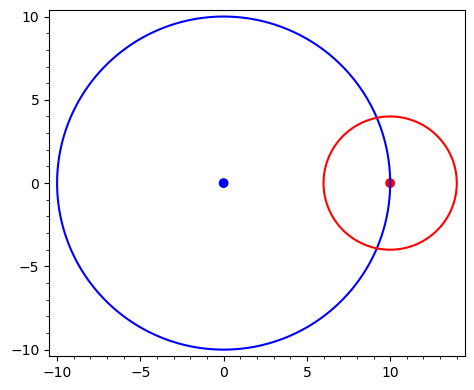

In [53]:
g1=implicit_plot(eq1.subs(env1),(-10,10),(-10,10))

g1+= implicit_plot(eq2.subs(env1),(6,14),(-4,4),color='red')

g1+= point((0,0),color='blue',size=50)

g1+= point((10,0),color='red',size=50)

g1

### Question
On cherche à trouver les équations des points $I$ et $J$ de la figure, c'est-à-dire les intersections des deux cercles. Par définition, ce sont les points qui vérifient l'équation de $C_1$ et celle de $C_2$. 
1. Utiliser `solve` pour trouver les couples $(x,y)$ qui vérifient les équations des deux cercles.
1. Définir les points $I$ et $J$ à partir des solutions trouvées précédemment. *Attention à ne pas inverser $I$ et $J$.* **Rappel** pour extraire la valeur d'une solution donnée comme une expression `x=val` on utilisera la méthode `.rhs()`.
1. Les points $I$ et $J$ sont définis de manière symbolique en fonction de $R_1$ et $R_2$. Trouver les points correspondant aux cercles définis précédemment ($R_1=10, R_2=4$). 
 - pour simplifier l'utilisation de `subs`, on peut définir un dictionnaire `d = {R1:10, R2:4}` et écrire `eq.subs(d)` plutôt que `eq.subs(R1 = 10, R2 = 4)`.
1. Tracer le même graphique que précédemment, en ajoutant les points $I$ et $J$ en couleur (différentes, pour les distinguer). 
    - *`point((x,y))` permet de tracer un point de coordonnées $(x,y)$ et admet beaucoup de paramètres optionnels, dont `color`, `zorder` (entier pour déterminer quel graphique est au premier plan, au deuxième plan, etc.) et `size` (entier qui fixe la taille du point).*
   

In [54]:
solC=solve((eq1,eq2),x,y)

I=(solC[1][0].rhs(),solC[1][1].rhs())

J=(solC[0][0].rhs(),solC[0][1].rhs())



In [55]:
I2=((I[0].subs(env1),I[1].subs(env1)))

J2=((J[0].subs(env1),J[1].subs(env1)))

I,J

((1/2*(2*R1^2 - R2^2)/R1, 1/2*sqrt(4*R1^2 - R2^2)*R2/R1),
 (1/2*(2*R1^2 - R2^2)/R1, -1/2*sqrt(4*R1^2 - R2^2)*R2/R1))

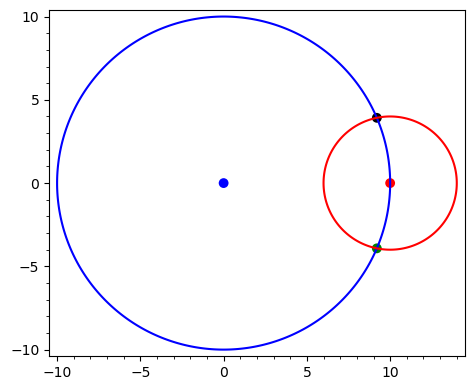

In [56]:
g1 += point(I2,color='black',size=50)

g1 += point(J2,color='green',size=50)

g1

### Question
1. Écrire une fonction `dessin` qui prend en paramètre les rayons $R_1$ et $R_2$ et renvoie le graphique représentant le problème, avec les éléments suivants :
    - les deux cercles, en bleu et rouge ;
    - les points $I$ et $J$, en vert ;
    - les points $O$ et $O_2$, en noir ;
    - le triangle $OIJ$ en rouge (utiliser `line`) ;
    - le triangle $O_2IJ$ en bleu ;
    - le segment $IJ$ en gris.

1. Faire une version interactive du dessin précédent, à l'aide de la commande suivante (à copier-coller) : 
   ```
   @interact
   def _(r1 = slider(1,20),r2 = slider(1,20)):
       return dessin(r1, r2)
   ```

In [57]:
def dessin(Ra,Rb):
    env={R1:Ra,R2:Rb}
    solC=solve((eq1,eq2),x,y)
    
    I=(solC[1][0].rhs(),solC[1][1].rhs())
    J=(solC[0][0].rhs(),solC[0][1].rhs())
    
    I=((I[0].subs(env),I[1].subs(env)))
    J=((J[0].subs(env),J[1].subs(env)))
    
    O=(0,0)
    O2=(10,0)
    
    g = point(O,color='black',size=50)

    g += point(O2,color='black',size=50)

    g += point(I,color='green',size=50)

    g += point(J,color='green',size=50)

    g += implicit_plot(eq1.subs(env),(-Ra,Ra),(-Ra,Ra),color='blue')

    g += implicit_plot(eq2.subs(env),(Ra-Rb,Ra+Rb),(-Rb,Rb),color='red')
    
    g += line([I,J],color='grey')
    
    g += line([O,I,J,O],color='red')
    
    g += line([O2,I,J,O2],color="blue")
    
    g.show()

    

In [58]:
@interact
def _(r1 = slider(1,20),r2 = slider(1,20)):
    return dessin(r1, r2)

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


### Question
Nous souhaitons maintenant calculer **de manière symbolique**, en fonction de $R_1$ et $R_2$, l'aire de l'intersection des cercles $C_1$ et $C_2$.
On commence par calculer l'aire des triangles $T_1 = OIJ$ et $T_2 = O_2IJ$. On rappelle qu'on note $H$ l'intersection de l'axe des abscisses et du segment $IJ$.

1. En remarquant que $T_1$ et $T_2$ peuvent tous les deux se découper en deux triangles rectangles en $H$, calculer l'aire de $T_1$ et celle de $T_2$.
1. Utiliser les fonctions de simplification `simplify` et `simplify_...` pour obtenir des expressions aussi simples que possibles.

Vous pourrez vérifier votre résultat sur l'exemple choisi ($R_1=10,R_2=4$). En particulier l'aire de $T_1$ est $\frac{368}{25}\sqrt(6)$ et l'aire de $T_2$ est $\frac{32}{25}\sqrt(6)$

In [59]:
var('x y R1 R2')
eqC1= x^2 + y^2 ==R1^2
eqC2= (x-R1)^2 + y^2 ==R2^2

solC=solve((eqC1,eqC2),x,y)

O=(0,0)
O2=(R1,0)

I=(solC[1][0].rhs(),solC[1][1].rhs())

J=(solC[0][0].rhs(),solC[0][1].rhs())

H=(I[0],0)



In [60]:

T1=I[1]*H[0]
T2=((R1-H[0]))*I[1]
T1=T1.simplify_full()
T2=T2.simplify_full()
T1,T2

(1/4*(2*R1^2*R2 - R2^3)*sqrt(4*R1^2 - R2^2)/R1^2,
 1/4*sqrt(4*R1^2 - R2^2)*R2^3/R1^2)

In [61]:
T1bis=T1.subs(env1)
T2bis=T2.subs(env1)
T1bis,T2bis

(368/25*sqrt(6), 32/25*sqrt(6))

### Question
Afin de calculer les aires des secteurs angulaires, on cherche à déterminer les angles $\theta_1 = \widehat{IOH}$ et $\theta_2 = \widehat{IO_2H}$. On rappelle que dans un triangle $ABC$ rectangle en $B$, l'angle $\theta = \widehat{BAC}$ vérifie $\cos\theta = \frac{AB}{AC}$ (« adjacent / hypothénuse ») et $\sin\theta = \frac{BC}{AC}$ (« opposé / hypothénuse »).
1. Calculer $\cos\theta_1$, $\sin\theta_1$, $\cos\theta_2$ et $\sin\theta_2$.
1. Simplifier les expressions autant que possible.

In [62]:
def distance(A,B):
    return sqrt((A[0]-B[0])^2+(A[1]-B[1])^2)

hypo1=distance(O,I)
hypo2=distance(O2,I)

co1= H[0]/hypo1.simplify_full()
si1= I[1]/hypo1.simplify_full()

co2= (R1-H[0]).simplify_full()/hypo2.simplify_full()
si2= I[1]/hypo2.simplify_full()

co1,si1,co2,si2

(1/2*(2*R1^2 - R2^2)/(sqrt(R1^2)*R1),
 1/2*sqrt(4*R1^2 - R2^2)*R2/(sqrt(R1^2)*R1),
 1/2*R2^2/(R1*sqrt(R2^2)),
 1/2*sqrt(4*R1^2 - R2^2)*R2/(R1*sqrt(R2^2)))

### Question
On note $S_1$ le *secteur angulaire* $OIJ$ du cercle $C_1$, et $S_2$ le *secteur angulaire* $O_2IJ$ de $C_2$.
L'aire d'un cercle de rayon $R$ est $\pi R^2$, et correspond à un secteur angulaire d'angle $2\pi$. De manière proportionnelle, l'aire d'un secteur angulaire d'angle au centre $\theta$ est $\frac{1}{2} r^2\theta = \frac{\theta}{2\pi} \times \pi r^2$.

1. Calculer $\theta_1$ et $\theta_2$ à l'aide de la fonction $\arccos$.
1. En déduire l'aire des secteurs angulaires $S_1$ et $S_2$. *Attention les angles $\theta_1,\theta_2$ sont pris aux aux centres de $S_1$ et $S_2$.*

Vous pourrez vérifier votre résultat sur l'exemple choisi ($R_1=10,R_2=4$). En particulier l'aire de $S_1$ est $100\arccos(\frac{23}{25})$ et l'aire de $S_2$ est $16\arccos(\frac{1}{5})$.

In [63]:
theta1=arccos(H[0]/hypo1)
theta2=arccos((R1-H[0])/hypo2)

theta1=theta1.simplify_full()
theta2=theta2.simplify_full()
theta1,theta2

(arccos(1/2*(2*R1^2 - R2^2)/(sqrt(R1^2)*R1)), arccos(1/2*R2^2/(R1*sqrt(R2^2))))

In [64]:
S1= (theta1/(2*pi))*pi*R1^2*2
S2= (theta2/(2*pi))*pi*R2^2*2

S1=S1.simplify_full()
S2=S2.simplify_full()

test1=S1.subs(env1)
test2=S2.subs(env1)

S1,S2,T1,T2

(pi*R1^2 - (pi - arccos(1/2*(2*R1^2 - R2^2)/(sqrt(R1^2)*R1)))*R1^2,
 R2^2*arccos(1/2*R2^2/(R1*sqrt(R2^2))),
 1/4*(2*R1^2*R2 - R2^3)*sqrt(4*R1^2 - R2^2)/R1^2,
 1/4*sqrt(4*R1^2 - R2^2)*R2^3/R1^2)

### Question
1. En déduire l'aire de l'intersection de $C_1$ et $C_2$, et la simplifier autant que possible. Votre expression ne doit contenir qu'une seule racine carrée.
1. Vérifier que l'aire trouvée est bien cohérente dans les cas limites $R_2 = 0$ et $R2 = 2R_1$. *Quelles doivent être les réponses dans ces deux cas ? Vous pouvez vous aider des graphiques !*

In [65]:
AireInter=(S1-T1)+(S2-T2)
AireInter

pi*R1^2 - (pi - arccos(1/2*(2*R1^2 - R2^2)/(sqrt(R1^2)*R1)))*R1^2 + R2^2*arccos(1/2*R2^2/(R1*sqrt(R2^2))) - 1/4*sqrt(4*R1^2 - R2^2)*R2^3/R1^2 - 1/4*(2*R1^2*R2 - R2^3)*sqrt(4*R1^2 - R2^2)/R1^2

In [66]:
AireInter.simplify_full()

pi*R1^2 - (pi - arccos(1/2*(2*R1^2 - R2^2)/(sqrt(R1^2)*R1)))*R1^2 + R2^2*arccos(1/2*R2^2/(R1*sqrt(R2^2))) - 1/2*sqrt(4*R1^2 - R2^2)*R2

In [67]:
show("Si R2 vaut 0, cela retourne un erreur et si R2 vaut 2R, alors l'aire vaut 0")

"Si R2 vaut 0, cela retourne un erreur et si R2 vaut 2R, alors l'aire vaut 0"

### Question
On cherche maintenant à déterminer quand est-ce que cette aire vaut la moitié de l'aire du cercle $C_1$. Afin de simplifier les calculs, on effectue la remarque suivante : ce qui compte est le ratio entre les rayons $R_1$ et $R_2$, plus que les valeurs des rayons eux-mêmes. On va donc, dans la suite, travailler avec $R_2 = kR_1$ pour un certain $k$.
1. Définir la variable $k$, et l'expression de l'aire en fonction de $R_1$ et $k$. *Simplifier.*
1. On remarque que l'aire est un multiple de $R_1^2$ (peu étonnant !). SageMath arrive-t-il à s'en rendre compte ?
1. Simplifier encore l'aire pour mettre $R_1^2$ en facteur. *Pour simplifier une expression en aidant SageMath, on peut utiliser `expr.subs(e1 == e2)` pour remplacer toute l'expression `e1` par l'expression `e2` dans `expr`. Attention : SageMath ne vérifie pas que l'égalité `e1 == e2` est vraie, il fait confiance à l'utilisateur !*

Dans notre cas il vous faudra simplifier l'expression $\sqrt{-R_1^2*k^2+4*R_1^2}$

In [68]:
var('k')
envRapports={R2:k*R1}

AireInterRatio=AireInter.subs(envRapports)

AireInterRatio=AireInterRatio.simplify_full()

AireInterRatio

R1^2*k^2*arccos(1/2*R1*k^2/sqrt(R1^2*k^2)) + pi*R1^2 - R1^2*arccos(1/2*(R1*k^2 - 2*R1)/sqrt(R1^2)) - 1/2*sqrt(-R1^2*k^2 + 4*R1^2)*R1*k

In [69]:
AireInterRatio=AireInterRatio.factor()

AireInterRatio

1/2*(2*R1*k^2*arccos(1/2*R1*k^2/sqrt(R1^2*k^2)) + 2*pi*R1 - 2*R1*arccos(1/2*(k^2 - 2)*R1/sqrt(R1^2)) - sqrt(-(k^2 - 4)*R1^2)*k)*R1

### Question
On cherche maintenant à résoudre le problème présenté à la question précédente : déterminer pour quelles valeurs de $R_1$ et $R_2$, l'aire de l'intersection est égale à la moitié de l'aire de $C_1$. 
1. Écrire l'équation qu'on cherche à résoudre en fonction de $R_1$ et $k$.
1. Simplifier l'équation : par quoi peut-on diviser ?
1. Résoudre l'équation à l'aide de `solve` : le résultat est-il satisfaisant ?


In [70]:
AireC1= pi*R1^2

eqAireMoit=AireInterRatio==AireC1/2

eqAireMoit

1/2*(2*R1*k^2*arccos(1/2*R1*k^2/sqrt(R1^2*k^2)) + 2*pi*R1 - 2*R1*arccos(1/2*(k^2 - 2)*R1/sqrt(R1^2)) - sqrt(-(k^2 - 4)*R1^2)*k)*R1 == 1/2*pi*R1^2

In [71]:
eqAireMoit=eqAireMoit/R1^2

eqAireMoit

1/2*(2*R1*k^2*arccos(1/2*R1*k^2/sqrt(R1^2*k^2)) + 2*pi*R1 - 2*R1*arccos(1/2*(k^2 - 2)*R1/sqrt(R1^2)) - sqrt(-(k^2 - 4)*R1^2)*k)/R1 == 1/2*pi

In [72]:
solCRatio=solve(eqAireMoit,x,y)

solCRatio

[]

In [73]:
show("PAS CONTENT, PAS CONTENT, IL MARCHE PAS")

'PAS CONTENT, PAS CONTENT, IL MARCHE PAS'

### Question
Il est normal que SageMath ne sache pas résoudre l'équation, car elle n'admet pas de solution *analytique* (c'est-à-dire exprimable avec des fonctions usuelles). On cherche donc à résoudre l'équation de manière approchée, avec `find_root`.
1. La fonction `find_root` requiert un intervalle de recherche sur $k$ pour trouver une solution.  Tracer la courbe correspondant à l'équation que l'on cherche à résoudre et déterminer  des valeurs adéquates pour `find_root`.
1. Résoudre l'équation de manière approchée avec `find_root` et vérifier le résultat.
1. Reproduire le dessin avec cette valeur de $k$.

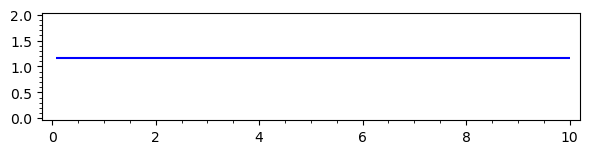

In [74]:
g= implicit_plot(eqAireMoit,(0,10),(0,2))

g

In [75]:

f(rayon,ratio)=AireInterRatio.subs({R1:rayon,k:ratio})-AireC1.subs({R1:rayon,k:ratio})/2

In [76]:
kOptimal=find_root(f(10,x),1,2)

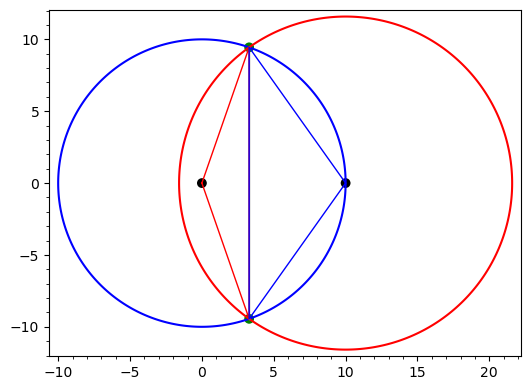

In [77]:
dessin(10,kOptimal*10)

### Question
On a vu que pour $k = 0$, l'aire de l'intersection est nulle ; pour $k = 2$, c'est l'aire de $C_1$ tout entier ; et on a calculer $k$ tel que l'aire soit la moitié de celle de $C_1$. 

Tracer la courbe de la proportion entre l'aire de l'intersection et l'aire de $C_1$ en fonction de $k$.

In [78]:
proportion=AireInterRatio/AireC1
p(rayon,ratio)=AireInterRatio.subs({R1:rayon,k:ratio})/AireC1.subs({R1:rayon,k:ratio})

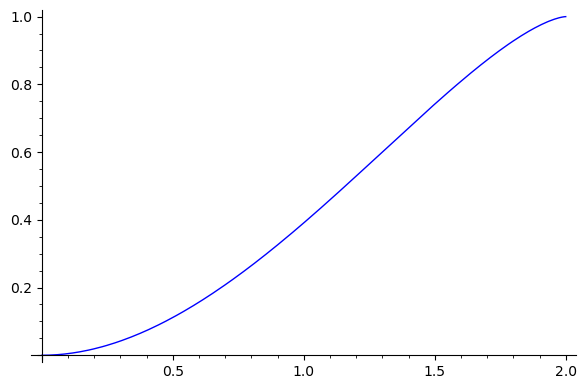

In [81]:
plot(p(1,x),0,2)